# Strategy Simulation

In [ ]:
import financial.data as fd
import financial.portfolio as fp
import financial.strategies.simulation as fss

import os

In [ ]:
from financial.io.cache import NoUpdateStrategy
from financial.io.file.cache import FileCache

print(os.environ["DATA"])
print(os.environ["CACHE"])
ds = fd.CachedDataStore(path=os.environ["DATA"], cache=FileCache(cache_path=os.environ["CACHE"]+"/", update_strategy=NoUpdateStrategy()))

print(ds)

..\acci-data-history
..\acci-cache
CachedDataStore with 907 data sources [cache stats: {'size': 0, 'hit': 0, 'miss': 0, 'write': 0, 'read': 0, 'update': 0}]


In [ ]:
hyperparameters = {
    "universe": "ishares.us", # "spdr.us" "ishares.us" "spdr.ucits" "ishares.ucits" "ucits"
    "topk": 4,
    "momentum": "mid-term", # "1m" "3m" "6m" "9m" "12m" "short-term" "mid-term" "ferrer" "requejo"
    "trade": -1, # -1 last day, +1 first day, +2 second day with 1st day momentum
    "year": 2001, # 2001 2016 2018
}
experiment_id = f"acci.{hyperparameters['universe']}.top{hyperparameters['topk']}.{hyperparameters['momentum']}.{hyperparameters['trade']}.{hyperparameters['year']}"

experiment_id

'acci.ishares.us.top4.mid-term.-1.2001'

# Signals

In [ ]:
import financial.strategies.technical.indicator as st

# Momentum

momentum1m = st.Momentum()
momentum1m.set_parameters({'delay': 20})

momentum2m = st.Momentum()
momentum2m.set_parameters({'delay': 40})

momentum3m = st.Momentum()
momentum3m.set_parameters({'delay': 60})

momentum4m = st.Momentum()
momentum4m.set_parameters({'delay': 84})

momentum6m = st.Momentum()
momentum6m.set_parameters({'delay': 126})

momentum8m = st.Momentum()
momentum8m.set_parameters({'delay': 168})

momentum9m = st.Momentum()
momentum9m.set_parameters({'delay': 189})

momentum1y = st.Momentum()
momentum1y.set_parameters({'delay': 252})

# Aggregation

indicator_short_term = st.Mean()
indicator_short_term.set_parameters({'components': [momentum1m.to_dict(), momentum2m.to_dict(), momentum3m.to_dict()]})
#print(indicator_short_term.to_dict())

indicator_mid_term = st.Mean()
indicator_mid_term.set_parameters({'components': [momentum3m.to_dict(), momentum6m.to_dict(), momentum1y.to_dict()]})
#print(indicator_mid_term.to_dict())

indicator_ferrer = st.Mean()
indicator_ferrer.set_parameters({'components': [momentum4m.to_dict(), momentum6m.to_dict(), momentum8m.to_dict()]})
#print(indicator_ferrer.to_dict())

indicator_requejo = st.Mean() # st.Sum() # Average instead of sum to make it comparable
indicator_requejo.set_parameters({'components': [momentum1m.to_dict(), momentum3m.to_dict(), momentum6m.to_dict(), momentum9m.to_dict(), momentum1y.to_dict()]})
#print(indicator_requejo.to_dict())

momentum = {
    "1m": momentum1m,
    "3m": momentum3m,
    "6m": momentum6m,
    "9m": momentum9m,
    "12m": momentum1y,
    "ferrer": indicator_ferrer,
    "requejo": indicator_requejo,
    "short-term": indicator_short_term,
    "mid-term": indicator_mid_term
}


print(hyperparameters["momentum"])
print(momentum[hyperparameters["momentum"]].to_dict())


mid-term
{'type': 'financial.strategies.technical.indicator.Mean', 'components': [{'type': 'financial.strategies.technical.indicator.Momentum', 'delay': 60}, {'type': 'financial.strategies.technical.indicator.Momentum', 'delay': 126}, {'type': 'financial.strategies.technical.indicator.Momentum', 'delay': 252}]}


# Strategies

In [ ]:
import financial.strategies.allocation as fsa
import financial.strategies.filter as fsf
import financial.strategies.rank as fsr

# Asset Universe

universe_ferrer = ['XLI', 'XLF', 'XLV', 'XLK', 'XLC', 'XLU', 'XLY', 'XLB', 'XLE', 'XLP',
                    'TLT', 'TIP', 'IEF', 'SHY', 'AGG', 'VNQ', 'GLD', 'DBC'] # IAU excluded

universe_requejo = ['XLE', 'XLF', 'XLU', 'XLI', 'XLK', 'XLV', 'XLY', 'XLP', 'XLB', 'XOP',
                    'XHB', 'XME', 'XRT', 'XTL', 'TLT', 'DBC']

universe_ing = ['XLI', 'XLF', 'XLV', 'XLK', 'XLY', 'XLB', 'XLP',
                'SPY', 'DJE', 'NASD',
                'IOGP', 'IQQH', 'RBOT', 'HEAL',
                'PHAU', 'LYTR', 'GLRE']

universe_ing_eur = ['ZPDM', 'ZPDI', 'ZPDS', 'ZPDH', 'ZPDT', 'ZPDD', 'ZPDF',
                   'SPY5', 'DJE', 'UST', 'LYTR', 'IQQH'] # , 'IOGP', 'GLRE', 'PHAU', 'HEAL', 'RBOT']


universe_spdr_us = ['XLE', 'XLB', 'XLI', 'XLY', 'XLP', 'XLV', 'XLF', 'XLK', 'XLC', 'XLU', 'XLRE', 'XSD']

universe_spdr_ucits = ['SXLB', 'SXLI', 'SXLY', 'SXLP', 'SXLV', 'SXLF', 'SXLK', 'GLRE', 'SMH.L']

universe_ishares_us = ['IYE', 'IYM', 'IYJ', 'IYK', 'IYC', 'IYH', 'IYF', 'IYW', 'IYZ', 'IDU', 'IYR', 'SOXX']

universe_ishares_ucits = ['IUES', 'IUMS', 'IUIS', 'IUCD', 'IUCS', 'IUHC', 'IUFS', 'IUIT', 'IUCM', 'IUUS', 'IDUP', 'SEMI.AS']

universe_ucits = universe_spdr_ucits + universe_ishares_ucits + ['RBOT', 'HEAL', 'CSPX'] # 'IQQH' @ EUR

universe = {
    "ferrer": universe_ferrer,
    "requejo": universe_requejo,
    "ing": universe_ing,
    "ing.eur": universe_ing_eur,
    "spdr.us": universe_spdr_us,
    "spdr.ucits": universe_spdr_ucits,
    "ishares.us": universe_ishares_us,
    "ishares.ucits": universe_ishares_ucits,
    "ucits": universe_ucits
}

from typing import List

def universe_report(tickers: List[str]):
    for ticker in tickers:
        metadata = ds.get_metadata(ticker)
        #print(metadata)
        print(f"{ticker:4} {metadata['currency']} {metadata['since']} {metadata['isin']} {metadata['description']}")


for etfs in universe:
    print(etfs)
    universe_report(universe[etfs])




ferrer
XLI  USD 02/01/2001 US81369Y7040 Industrial SPDR Select Sector ETF
XLF  USD 30/03/2001 US81369Y6059 Financial SPDR Select Sector ETF
XLV  USD 02/01/2001 US81369Y2090 Health Care SPDR Select Sector ETF
XLK  USD 02/01/2001 US81369Y8030 Technology SPDR Select Sector ETF
XLC  USD 20/06/2018 US81369Y8527 Communication Services SPDR Select Sector ETF
XLU  USD 27/11/2017 US81369Y8865 Utilities SPDR Select Sector ETF
XLY  USD 02/01/2001 US81369Y4070 Consumer Discretionary SPDR Select Sector ETF
XLB  USD 02/01/2001 US81369Y1001 Materials SPDR Select Sector ETF
XLE  USD 30/03/2001 US81369Y5069 Energy SPDR Select Sector ETF
XLP  USD 02/01/2001 US81369Y3080 Consumer Staples SPDR Select Sector ETF
TLT  USD 30/07/2002 US4642874329 US Bond 20+yr iShares ETF
TIP  USD 05/12/2003 US4642871762 US TIPS Bond iShares ETF
IEF  USD 07/07/2015 US4642874402 US Bond 7-10yr iShares ETF NASDAQ
SHY  USD 07/07/2015 US4642874576 US Bond 1-3yr iShares ETF NASDAQ
AGG  USD 29/09/2003 US4642872265 US Aggregate Bon

In [ ]:
# Asset ranking strategies

ferrer_refuge = None # refuge
ferrer_filter = fsf.CompositeAssetFilter( [fsf.TopKAssetFilter(k=10), fsf.MinimumValueAssetFilter(threshold=0.0)] )
ferrer_allocation = fsa.FixedWeightAllocation(0.10)
ferrer_strategy = fsr.AssetRankingStrategy("HUGO FERRER'S STRATEGY", universe_ferrer,indicator_ferrer, ferrer_filter, ferrer_allocation, ferrer_refuge)
print(ferrer_strategy)

requejo_filter = fsf.TopKAssetFilter(k=4)
requejo_allocation = fsa.EqualWeightAllocation()
requejo_strategy = fsr.AssetRankingStrategy("DANIEL REQUEJO'S STRATEGY", universe_requejo, indicator_requejo, requejo_filter, requejo_allocation)
print(requejo_strategy)

ferrer_strategy_ing = fsr.AssetRankingStrategy("ING @ Ferrer's strategy", universe_ing_eur, indicator_ferrer, ferrer_filter, ferrer_allocation)
print(ferrer_strategy_ing)

requejo_strategy_ing = fsr.AssetRankingStrategy("ING @ Requejo's strategy", universe_ing_eur, indicator_requejo, requejo_filter, requejo_allocation)
print(requejo_strategy_ing)


acci_topk = hyperparameters["topk"]
acci_refuge = None # refuge
acci_filter = fsf.CompositeAssetFilter( [fsf.TopKAssetFilter(k=acci_topk), fsf.MinimumValueAssetFilter(threshold=0.0)] )
acci_allocation = fsa.FixedWeightAllocation(1.0/acci_topk)
acci_strategy = fsr.AssetRankingStrategy(f"ACCI'S TOP-{acci_topk} STRATEGY", universe[hyperparameters["universe"]], momentum[hyperparameters["momentum"]], acci_filter, acci_allocation, acci_refuge)
print(acci_strategy)
#print(acci_filter)


HUGO FERRER'S STRATEGY
- 18 asset universe: ['XLI', 'XLF', 'XLV', 'XLK', 'XLC', 'XLU', 'XLY', 'XLB', 'XLE', 'XLP', 'TLT', 'TIP', 'IEF', 'SHY', 'AGG', 'VNQ', 'GLD', 'DBC']
- Indicator: {'type': 'financial.strategies.technical.indicator.Mean', 'components': [{'type': 'financial.strategies.technical.indicator.Momentum', 'delay': 84}, {'type': 'financial.strategies.technical.indicator.Momentum', 'delay': 126}, {'type': 'financial.strategies.technical.indicator.Momentum', 'delay': 168}]}
DANIEL REQUEJO'S STRATEGY
- 16 asset universe: ['XLE', 'XLF', 'XLU', 'XLI', 'XLK', 'XLV', 'XLY', 'XLP', 'XLB', 'XOP', 'XHB', 'XME', 'XRT', 'XTL', 'TLT', 'DBC']
- Indicator: {'type': 'financial.strategies.technical.indicator.Mean', 'components': [{'type': 'financial.strategies.technical.indicator.Momentum', 'delay': 20}, {'type': 'financial.strategies.technical.indicator.Momentum', 'delay': 60}, {'type': 'financial.strategies.technical.indicator.Momentum', 'delay': 126}, {'type': 'financial.strategies.techni

# Porfolio performance

In [ ]:
portfolio = fp.StockPortfolio("Stocks")
portfolio.add('$$$', '2001-01-01', 1000000, 1000000)

print(portfolio)

for ticker in portfolio.lots:
    print(portfolio.lots[ticker])

print(f"- Cost:  ${portfolio.cost():10.2f}")
print(f"- Value: ${portfolio.value(ds):10.2f}")
print(f"- Gain:  ${portfolio.gain(ds):>10.2f}  {100*portfolio.gain(ds)/portfolio.cost():>6.2f}%")
print()

fss.SimulationReport.value_report(ds,portfolio,start_year=2000)
print()
fss.SimulationReport.performance_report(ds,portfolio,start_year=2000)
fss.SimulationReport.performance_report_stocks(ds,portfolio,start_year=2000)

Stocks: ['$$$']
$$$: [{'index': '2001-01-01', 'stocks': 1000000, 'cost': 1000000}]
- Cost:  $1000000.00
- Value: $1000000.00
- Gain:  $      0.00    0.00%

           YEAR        Jan        Feb        Mar        Apr        May        Jun        Jul        Aug        Sep        Oct        Nov        Dec
  2000:       0.00                                                                                                
  2001: 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00
  2002: 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00
  2003: 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00
  2004: 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00

  2019:    0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%
  2020:    0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%
  2021:    0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%
  2022:    0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%
  2023:    0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%


In [ ]:
import financial.portfolios.statistics as fps

assets = {'^GSPC': 1.0}
target = fp.WeightedPortfolio.from_assets("Target", assets)
print(target)

print("Daily returns")
benchmark_returns = target.returns(ds,'2015-12-31','2023-12-31')
print(benchmark_returns)
print("Monthly returns")
benchmark_monthly_returns = fss.SimulationUtilities.monthly_returns(ds,target,2016,2023)
print(benchmark_monthly_returns)
benchmark_cumulative_returns = fps.CumulativeReturn().get_series(benchmark_monthly_returns)
print("Cumulative returns")
print(benchmark_cumulative_returns)

fss.SimulationReport.performance_report(ds, target, 2001)

print("\n Cumulative return")
fss.SimulationReport.cumulative_report(ds, target, 2001)


Target:
      ticker  weight  cost  isin description
^GSPC  ^GSPC     1.0  None  None        None
Daily returns
2016-01-04   -0.015304
2016-01-05    0.002012
2016-01-06   -0.013115
2016-01-07   -0.023700
2016-01-08   -0.010838
                ...   
2023-06-30    0.012269
2023-07-03    0.001171
2023-07-05   -0.001968
2023-07-06   -0.007923
2023-07-07   -0.002865
Length: 1890, dtype: float64
Monthly returns
2016-01-31   -0.050735
2016-02-29   -0.004128
2016-03-31    0.065991
2016-04-30    0.002699
2016-05-31    0.015329
                ...   
2023-08-31    0.000000
2023-09-30    0.000000
2023-10-31    0.000000
2023-11-30    0.000000
2023-12-31    0.000000
Name: return, Length: 96, dtype: float64
Cumulative returns
2016-01-31   -0.050735
2016-02-29   -0.054654
2016-03-31    0.007730
2016-04-30    0.010450
2016-05-31    0.025940
                ...   
2023-08-31    1.152191
2023-09-30    1.152191
2023-10-31    1.152191
2023-11-30    1.152191
2023-12-31    1.152191
Name: return, Length: 96

# Strategy simulation

In [ ]:
%%time
import financial.strategies.rebalance as fsrebalance

simulation_strategy = experiment_id # "requejo.ing" # "ferrer" ferrer.ing"
strategy = acci_strategy #requejo_strategy_ing #ferrer_strategy_ing #ferrer_strategy
benchmark = fp.BenchmarkPortfolio("^GSPC")
market = ds.get_data("^GSPC")
rebalancing = fsrebalance.MonthlyRebalancingSchedule(hyperparameters["trade"],market) # +1 first day, -1 last day, +2 second day with 1st day momentum

print("STRATEGY")
print(strategy)
print("BENCHMARK")
print(benchmark)
print("REBALANCING")
print(rebalancing)

simulation = fss.StockStrategySimulation(ds, strategy, rebalancing, market)
simulation.verbose = True  # verbose 41.7s vs. 27s without trading details
simulation_start_year = hyperparameters["year"]
simulation_end_year = 2023
simulation.simulate(start_year=simulation_start_year, end_year=simulation_end_year)


STRATEGY
ACCI'S TOP-4 STRATEGY
- 12 asset universe: ['IYE', 'IYM', 'IYJ', 'IYK', 'IYC', 'IYH', 'IYF', 'IYW', 'IYZ', 'IDU', 'IYR', 'SOXX']
- Indicator: {'type': 'financial.strategies.technical.indicator.Mean', 'components': [{'type': 'financial.strategies.technical.indicator.Momentum', 'delay': 60}, {'type': 'financial.strategies.technical.indicator.Momentum', 'delay': 126}, {'type': 'financial.strategies.technical.indicator.Momentum', 'delay': 252}]}
BENCHMARK
^GSPC(^GSPC)
REBALANCING
Rebalancing schedule: Monthly rebalancing on -1
INITIAL PORTFOLIO
Stocks: ['$$$']
Portfolio value: 1000000.00
Portfolio assets: {'$$$': 1000000.0}
Portfolio stocks: {'$$$': 1000000}
Portfolio weights: {'$$$': 1.0}
+ Rebalance @ 2001-01-30
- Portfolio value: $1000000.00
{'IYR': 0.25, 'IDU': 0.25, 'IYF': 0.25, 'IYM': 0.25}
+ Trade @ 2001-01-31
- Changes: {'IDU': 6250, 'IYF': 5780, 'IYM': 6640, '$$$': -999977.9701309204, 'IYR': 6553}
- Rotation: 100.00%
Before $1000000.00:
- Stocks: {'$$$': 1000000}
- Assets

- Changes: {'IYK': -253, 'IDU': 160, '$$$': 222697.33195114136, 'IYR': -169, 'IYJ': -9874}
- Rotation: 25.58%
Before $899938.92:
- Stocks: {'$$$': 82.71453857421875, 'IDU': 6551, 'IYF': 0, 'IYM': 0, 'IYR': 5792, 'IYJ': 9874, 'IYK': 5571}
- Assets: {'$$$': 82.71453857421875, 'IDU': 217493.20499801636, 'IYF': 0.0, 'IYM': 0.0, 'IYR': 229536.96618652344, 'IYJ': 210711.16150665283, 'IYK': 233424.9085006714}
Selling IYK: -253.00x$41.90 = $-10600.70
Selling IYR: -169.00x$39.63 = $-6697.47
Selling IYJ: -9874.00x$21.34 = $-210711.16
Buying IDU: 160.00x$33.20 = $5312.00
Buying $$$: 222697.33x$1.00 = $222697.33
After $899938.92:
- Stocks: {'$$$': 222780.04648971558, 'IDU': 6711, 'IYF': 0, 'IYM': 0, 'IYR': 5623, 'IYJ': 0, 'IYK': 5318}
- Assets: {'$$$': 222780.04648971558, 'IDU': 222805.20512008667, 'IYF': 0.0, 'IYM': 0.0, 'IYR': 222839.49600601196, 'IYJ': 0.0, 'IYK': 222824.20811462402}
+ Rebalance @ 2001-10-30
- Portfolio value: $881202.12
{'IYR': 0.25, 'IDU': 0.25, 'IYK': 0.25, 'IYM': 0.25}
+ Tr

- Assets: {'$$$': 226225.0951538086, 'IDU': 0.0, 'IYF': 0.0, 'IYM': 226238.69338989258, 'IYR': 226242.24603652954, 'IYJ': 0.0, 'IYK': 226188.89642715454, 'SOXX': 0.0}
+ Rebalance @ 2002-06-27
- Portfolio value: $911704.64
{'IYR': 0.25, 'IYK': 0.25, 'IYM': 0.25, '$$$': 0.25}
+ Trade @ 2002-06-28
- Changes: {'IYM': -4, 'IYK': 196, '$$$': -4263.08016204834, 'IYR': -103}
- Rotation: 1.00%
Before $915724.91:
- Stocks: {'$$$': 226225.0951538086, 'IDU': 0, 'IYF': 0, 'IYM': 5415, 'IYR': 5195, 'IYJ': 0, 'IYK': 4683, 'SOXX': 0}
- Assets: {'$$$': 226225.0951538086, 'IDU': 0.0, 'IYF': 0.0, 'IYM': 222177.44338989258, 'IYR': 226501.99207305908, 'IYJ': 0.0, 'IYK': 213076.5, 'SOXX': 0.0}
Selling IYM: -4.00x$41.03 = $-164.12
Selling $$$: -4263.08x$1.00 = $-4263.08
Selling IYR: -103.00x$43.60 = $-4490.80
Buying IYK: 196.00x$45.50 = $8918.00
After $915724.91:
- Stocks: {'$$$': 221962.01499176025, 'IDU': 0, 'IYF': 0, 'IYM': 5411, 'IYR': 5092, 'IYJ': 0, 'IYK': 4879, 'SOXX': 0}
- Assets: {'$$$': 221962.0149

- Portfolio value: $920599.64
{'IYZ': 0.25, 'IYW': 0.25, 'SOXX': 0.25, 'IYH': 0.25}
+ Trade @ 2003-06-30
- Changes: {'IYF': -5809, 'IYH': 4061, 'IYZ': 10697, 'IDU': -8183, 'IYW': 139, 'SOXX': 5076, '$$$': 95.31914901733398, 'IYR': -5254}
- Rotation: 75.15%
Before $919468.55:
- Stocks: {'$$$': 3.1460819244384766, 'IDU': 8183, 'IYF': 5809, 'IYM': 0, 'IYR': 5254, 'IYJ': 0, 'IYK': 0, 'SOXX': 0, 'IYW': 22791}
- Assets: {'$$$': 3.1460819244384766, 'IDU': 221759.30312156677, 'IYF': 221351.94234085083, 'IYM': 0.0, 'IYR': 222244.1959915161, 'IYJ': 0.0, 'IYK': 0.0, 'SOXX': 0.0, 'IYW': 219990.13097763062}
Selling IYF: -5809.00x$38.10 = $-221351.94
Selling IDU: -8183.00x$27.10 = $-221759.30
Selling IYR: -5254.00x$42.30 = $-222244.20
Buying IYH: 4061.00x$54.49 = $221283.90
Buying IYZ: 10697.00x$20.69 = $221320.94
Buying IYW: 139.00x$9.65 = $1341.70
Buying SOXX: 5076.00x$43.60 = $221313.59
Buying $$$: 95.32x$1.00 = $95.32
After $919468.55:
- Stocks: {'$$$': 98.46523094177246, 'IDU': 0, 'IYF': 0, 'IY

- Changes: {'IYM': -5842, 'IYE': 16078, 'IYJ': -12, 'IYW': -644, 'SOXX': -104, '$$$': -10.427543640136719}
- Rotation: 25.00%
Before $1118028.74:
- Stocks: {'$$$': -4.383406639099121, 'IDU': 0, 'IYF': 0, 'IYM': 5842, 'IYR': 0, 'IYJ': 10852, 'IYK': 0, 'SOXX': 4244, 'IYW': 21959, 'IYH': 0, 'IYZ': 0, 'IYC': 0}
- Assets: {'$$$': -4.383406639099121, 'IDU': 0.0, 'IYF': 0.0, 'IYM': 253893.31465148926, 'IYR': 0.0, 'IYJ': 269400.90827941895, 'IYK': 0.0, 'SOXX': 275860.0, 'IYW': 277232.375, 'IYH': 0.0, 'IYZ': 0.0, 'IYC': 0.0}
Selling IYM: -5842.00x$43.46 = $-253893.31
Selling IYJ: -12.00x$24.83 = $-297.90
Selling IYW: -644.00x$12.62 = $-8130.50
Selling SOXX: -104.00x$65.00 = $-6760.00
Selling $$$: -10.43x$1.00 = $-10.43
Buying IYE: 16078.00x$16.74 = $269092.14
After $1118028.74:
- Stocks: {'$$$': -14.81095027923584, 'IDU': 0, 'IYF': 0, 'IYM': 0, 'IYR': 0, 'IYJ': 10840, 'IYK': 0, 'SOXX': 4140, 'IYW': 21315, 'IYH': 0, 'IYZ': 0, 'IYC': 0, 'IYE': 16078}
- Assets: {'$$$': -14.81095027923584, 'IDU': 0

- Changes: {'IYM': -5572, 'IYE': 139, 'IYJ': -9687, 'IYZ': -45, 'IDU': 7976, '$$$': 34.28158378601074, 'IYR': 4487}
- Rotation: 50.27%
Before $1031478.61:
- Stocks: {'$$$': 5.121137619018555, 'IDU': 0, 'IYF': 0, 'IYM': 5572, 'IYR': 0, 'IYJ': 9687, 'IYK': 0, 'SOXX': 0, 'IYW': 0, 'IYH': 0, 'IYZ': 11107, 'IYC': 0, 'IYE': 12763}
- Assets: {'$$$': 5.121137619018555, 'IDU': 0.0, 'IYF': 0.0, 'IYM': 250907.1531982422, 'IYR': 0.0, 'IYJ': 242756.21482658386, 'IYK': 0.0, 'SOXX': 0.0, 'IYW': 0.0, 'IYH': 0.0, 'IYZ': 247019.67745780945, 'IYC': 0.0, 'IYE': 243347.87802696228}
Selling IYM: -5572.00x$45.03 = $-250907.15
Selling IYJ: -9687.00x$25.06 = $-242756.21
Selling IYZ: -45.00x$22.24 = $-1000.80
Buying IYE: 139.00x$19.07 = $2650.27
Buying IDU: 7976.00x$30.84 = $245979.84
Buying $$$: 34.28x$1.00 = $34.28
Buying IYR: 4487.00x$54.83 = $245999.78
After $1031478.61:
- Stocks: {'$$$': 39.4027214050293, 'IDU': 7976, 'IYF': 0, 'IYM': 0, 'IYR': 4487, 'IYJ': 0, 'IYK': 0, 'SOXX': 0, 'IYW': 0, 'IYH': 0, 'IYZ'

- Changes: {'IYM': -61, 'IYK': -4913, 'IYE': -993, 'IYJ': 10134, 'IDU': 351, '$$$': -42.02840995788574}
- Rotation: 26.11%
Before $1188348.42:
- Stocks: {'$$$': 42.06309700012207, 'IDU': 7558, 'IYF': 0, 'IYM': 5375, 'IYR': 0, 'IYJ': 0, 'IYK': 4913, 'SOXX': 0, 'IYW': 0, 'IYH': 0, 'IYZ': 0, 'IYC': 0, 'IYE': 11878}
- Assets: {'$$$': 42.06309700012207, 'IDU': 269027.0192260742, 'IYF': 0.0, 'IYM': 284821.25902175903, 'IYR': 0.0, 'IYJ': 0.0, 'IYK': 265056.35374832153, 'SOXX': 0.0, 'IYW': 0.0, 'IYH': 0.0, 'IYZ': 0.0, 'IYC': 0.0, 'IYE': 307244.26817703247}
Selling IYM: -61.00x$52.99 = $-3232.39
Selling IYK: -4913.00x$53.95 = $-265056.35
Selling IYE: -993.00x$25.87 = $-25685.60
Selling $$$: -42.03x$1.00 = $-42.03
Buying IYJ: 10134.00x$27.78 = $281522.53
Buying IDU: 351.00x$35.60 = $12493.85
After $1188348.42:
- Stocks: {'$$$': 0.034687042236328125, 'IDU': 7909, 'IYF': 0, 'IYM': 5314, 'IYR': 0, 'IYJ': 10134, 'IYK': 0, 'SOXX': 0, 'IYW': 0, 'IYH': 0, 'IYZ': 0, 'IYC': 0, 'IYE': 10885}
- Assets: {'$

- Changes: {'IYE': -306, 'IDU': -85, 'SOXX': 71, '$$$': -26.289573669433594, 'IYR': 134}
- Rotation: 1.06%
Before $1318612.07:
- Stocks: {'$$$': 46.715383529663086, 'IDU': 7436, 'IYF': 0, 'IYM': 0, 'IYR': 4563, 'IYJ': 0, 'IYK': 0, 'SOXX': 5023, 'IYW': 0, 'IYH': 0, 'IYZ': 0, 'IYC': 0, 'IYE': 10237}
- Assets: {'$$$': 46.715383529663086, 'IDU': 305396.5177307129, 'IYF': 0.0, 'IYM': 0.0, 'IYR': 293263.994682312, 'IYJ': 0.0, 'IYK': 0.0, 'SOXX': 297662.9715690613, 'IYW': 0.0, 'IYH': 0.0, 'IYZ': 0.0, 'IYC': 0.0, 'IYE': 311204.7960948944}
Selling IYE: -306.00x$30.40 = $-9302.40
Selling IDU: -85.00x$41.07 = $-3490.95
Selling $$$: -26.29x$1.00 = $-26.29
Buying SOXX: 71.00x$59.26 = $4207.46
Buying IYR: 134.00x$64.27 = $8612.18
After $1318612.07:
- Stocks: {'$$$': 20.425809860229492, 'IDU': 7351, 'IYF': 0, 'IYM': 0, 'IYR': 4697, 'IYJ': 0, 'IYK': 0, 'SOXX': 5094, 'IYW': 0, 'IYH': 0, 'IYZ': 0, 'IYC': 0, 'IYE': 9931}
- Assets: {'$$$': 20.425809860229492, 'IDU': 301905.56775665283, 'IYF': 0.0, 'IYM': 

- Changes: {'IYM': -227, 'IYE': 9766, 'IYJ': 9809, 'IYZ': -12099, 'SOXX': -76, '$$$': -77.66695213317871, 'IYR': -4261}
- Rotation: 50.00%
Before $1381075.03:
- Stocks: {'$$$': 40.628150939941406, 'IDU': 0, 'IYF': 0, 'IYM': 5591, 'IYR': 4261, 'IYJ': 0, 'IYK': 0, 'SOXX': 4803, 'IYW': 0, 'IYH': 0, 'IYZ': 12099, 'IYC': 0, 'IYE': 0}
- Assets: {'$$$': 40.628150939941406, 'IDU': 0.0, 'IYF': 0.0, 'IYM': 328750.7957344055, 'IYR': 302957.09349823, 'IYJ': 0.0, 'IYK': 0.0, 'SOXX': 320456.1658630371, 'IYW': 0.0, 'IYH': 0.0, 'IYZ': 309250.4335384369, 'IYC': 0.0, 'IYE': 0.0}
Selling IYM: -227.00x$58.80 = $-13347.60
Selling IYZ: -12099.00x$25.56 = $-309250.43
Selling SOXX: -76.00x$66.72 = $-5070.72
Selling $$$: -77.67x$1.00 = $-77.67
Selling IYR: -4261.00x$71.10 = $-302957.09
Buying IYE: 9766.00x$32.29 = $315344.15
Buying IYJ: 9809.00x$32.15 = $315359.36
After $1381075.03:
- Stocks: {'$$$': -37.038801193237305, 'IDU': 0, 'IYF': 0, 'IYM': 5364, 'IYR': 0, 'IYJ': 9809, 'IYK': 0, 'SOXX': 4727, 'IYW': 0, 

{'IYR': 0.25, 'IYZ': 0.25, 'IYE': 0.25, 'IDU': 0.25}
+ Trade @ 2006-11-30
- Changes: {'IYF': -5748, 'IYE': 9480, 'IYZ': 234, 'IDU': 7399, 'IYC': -19849, '$$$': 46.97268104553223, 'IYR': -122}
- Rotation: 50.50%
Before $1462333.67:
- Stocks: {'$$$': -39.62985801696777, 'IDU': 0, 'IYF': 5748, 'IYM': 0, 'IYR': 3973, 'IYJ': 0, 'IYK': 0, 'SOXX': 0, 'IYW': 0, 'IYH': 0, 'IYZ': 11370, 'IYC': 19849, 'IYE': 0}
- Assets: {'$$$': -39.62985801696777, 'IDU': 0.0, 'IYF': 329848.97035217285, 'IYM': 0.0, 'IYR': 341479.3378753662, 'IYJ': 0.0, 'IYK': 0.0, 'SOXX': 0.0, 'IYW': 0.0, 'IYH': 0.0, 'IYZ': 324272.40520477295, 'IYC': 328252.8450717926, 'IYE': 0.0}
Selling IYF: -5748.00x$57.38 = $-329848.97
Selling IYC: -19849.00x$16.54 = $-328252.85
Selling IYR: -122.00x$85.95 = $-10485.90
Buying IYE: 9480.00x$34.91 = $330946.80
Buying IYZ: 234.00x$28.52 = $6673.68
Buying IDU: 7399.00x$44.72 = $330920.26
Buying $$$: 46.97x$1.00 = $46.97
After $1462333.67:
- Stocks: {'$$$': 7.342823028564453, 'IDU': 7399, 'IYF': 0

- Stocks: {'$$$': -23.391691207885742, 'IDU': 6994, 'IYF': 0, 'IYM': 5326, 'IYR': 0, 'IYJ': 0, 'IYK': 0, 'SOXX': 0, 'IYW': 0, 'IYH': 0, 'IYZ': 11117, 'IYC': 0, 'IYE': 9606}
- Assets: {'$$$': -23.391691207885742, 'IDU': 356659.02252960205, 'IYF': 0.0, 'IYM': 377027.54487609863, 'IYR': 0.0, 'IYJ': 0.0, 'IYK': 0.0, 'SOXX': 0.0, 'IYW': 0.0, 'IYH': 0.0, 'IYZ': 384981.72187423706, 'IYC': 0.0, 'IYE': 378092.1658630371}
Selling IYM: -40.00x$70.79 = $-2831.60
Selling IYE: -99.00x$39.36 = $-3896.64
Selling IYZ: -311.00x$34.63 = $-10769.93
Buying IDU: 343.00x$50.99 = $17491.28
Buying $$$: 6.89x$1.00 = $6.89
After $1658176.60:
- Stocks: {'$$$': -16.505895614624023, 'IDU': 7337, 'IYF': 0, 'IYM': 5286, 'IYR': 0, 'IYJ': 0, 'IYK': 0, 'SOXX': 0, 'IYW': 0, 'IYH': 0, 'IYZ': 10806, 'IYC': 0, 'IYE': 9507}
- Assets: {'$$$': -16.505895614624023, 'IDU': 374150.3071632385, 'IYF': 0.0, 'IYM': 374195.94483947754, 'IYR': 0.0, 'IYJ': 0.0, 'IYK': 0.0, 'SOXX': 0.0, 'IYW': 0.0, 'IYH': 0.0, 'IYZ': 374211.7915420532, '

After $1690585.22:
- Stocks: {'$$$': -4.813932418823242, 'IDU': 7392, 'IYF': 0, 'IYM': 5086, 'IYR': 0, 'IYJ': 0, 'IYK': 0, 'SOXX': 0, 'IYW': 24602, 'IYH': 0, 'IYZ': 0, 'IYC': 0, 'IYE': 8947}
- Assets: {'$$$': -4.813932418823242, 'IDU': 379764.0, 'IYF': 0.0, 'IYM': 379822.481552124, 'IYR': 0.0, 'IYJ': 0.0, 'IYK': 0.0, 'SOXX': 0.0, 'IYW': 379793.375, 'IYH': 0.0, 'IYZ': 0.0, 'IYC': 0.0, 'IYE': 379800.1568260193}
+ Rebalance @ 2007-12-28
- Portfolio value: $1755716.76
{'IYE': 0.25, 'IYM': 0.25, 'IDU': 0.25, 'IYW': 0.25}
+ Trade @ 2007-12-31
- Changes: {'IYM': -10, 'IYE': -390, 'IDU': 236, 'IYW': 415, '$$$': 11.094316482543945}
- Rotation: 1.19%
Before $1738712.28:
- Stocks: {'$$$': -4.813932418823242, 'IDU': 7392, 'IYF': 0, 'IYM': 5086, 'IYR': 0, 'IYJ': 0, 'IYK': 0, 'SOXX': 0, 'IYW': 24602, 'IYH': 0, 'IYZ': 0, 'IYC': 0, 'IYE': 8947}
- Assets: {'$$$': -4.813932418823242, 'IDU': 378507.37353515625, 'IYF': 0.0, 'IYM': 391418.55534362793, 'IYR': 0.0, 'IYJ': 0.0, 'IYK': 0.0, 'SOXX': 0.0, 'IYW':

- Changes: {'IYM': 106, 'IYE': 752, '$$$': -40787.8586730957}
- Rotation: 2.92%
Before $1607524.59:
- Stocks: {'$$$': 739886.1549987793, 'IDU': 0, 'IYF': 0, 'IYM': 4381, 'IYR': 0, 'IYJ': 0, 'IYK': 0, 'SOXX': 0, 'IYW': 0, 'IYH': 0, 'IYZ': 0, 'IYC': 0, 'IYE': 7327}
- Assets: {'$$$': 739886.1549987793, 'IDU': 0.0, 'IYF': 0.0, 'IYM': 341236.0873260498, 'IYR': 0.0, 'IYJ': 0.0, 'IYK': 0.0, 'SOXX': 0.0, 'IYW': 0.0, 'IYH': 0.0, 'IYZ': 0.0, 'IYC': 0.0, 'IYE': 316966.0077018738}
Selling $$$: -40787.86x$1.00 = $-40787.86
Buying IYM: 106.00x$77.89 = $8256.34
Buying IYE: 752.00x$43.26 = $32531.52
After $1607524.59:
- Stocks: {'$$$': 699098.2963256836, 'IDU': 0, 'IYF': 0, 'IYM': 4487, 'IYR': 0, 'IYJ': 0, 'IYK': 0, 'SOXX': 0, 'IYW': 0, 'IYH': 0, 'IYZ': 0, 'IYC': 0, 'IYE': 8079}
- Assets: {'$$$': 699098.2963256836, 'IDU': 0.0, 'IYF': 0.0, 'IYM': 349492.42726135254, 'IYR': 0.0, 'IYJ': 0.0, 'IYK': 0.0, 'SOXX': 0.0, 'IYW': 0.0, 'IYH': 0.0, 'IYZ': 0.0, 'IYC': 0.0, 'IYE': 349497.52643966675}
+ Rebalance @ 

- Changes: {'IYZ': 18550, 'IYW': 30707, 'SOXX': 9124, 'IYC': 28693, '$$$': -1277716.5978775024}
- Rotation: 100.00%
Before $1489570.51:
- Stocks: {'$$$': 1277725.280670166, 'IDU': 0, 'IYF': 0, 'IYM': 0, 'IYR': 0, 'IYJ': 0, 'IYK': 0, 'SOXX': 0, 'IYW': 0, 'IYH': 0, 'IYZ': 0, 'IYC': 0, 'IYE': 0}
- Assets: {'$$$': 1277725.280670166, 'IDU': 0.0, 'IYF': 0.0, 'IYM': 0.0, 'IYR': 0.0, 'IYJ': 0.0, 'IYK': 0.0, 'SOXX': 0.0, 'IYW': 0.0, 'IYH': 0.0, 'IYZ': 0.0, 'IYC': 0.0, 'IYE': 0.0}
Selling $$$: -1277716.60x$1.00 = $-1277716.60
Buying IYZ: 18550.00x$17.22 = $319430.99
Buying IYW: 30707.00x$10.40 = $319429.57
Buying SOXX: 9124.00x$35.01 = $319431.22
Buying IYC: 28693.00x$11.13 = $319424.81
After $1489570.51:
- Stocks: {'$$$': 8.682792663574219, 'IDU': 0, 'IYF': 0, 'IYM': 0, 'IYR': 0, 'IYJ': 0, 'IYK': 0, 'SOXX': 9124, 'IYW': 30707, 'IYH': 0, 'IYZ': 18550, 'IYC': 28693, 'IYE': 0}
- Assets: {'$$$': 8.682792663574219, 'IDU': 0.0, 'IYF': 0.0, 'IYM': 0.0, 'IYR': 0.0, 'IYJ': 0.0, 'IYK': 0.0, 'SOXX': 31943

- Changes: {'IYF': -14498, 'IYM': -161, 'IYW': 27941, 'SOXX': 331, 'IYC': 28193, '$$$': -10.055279731750488, 'IYR': -8948}
- Rotation: 50.93%
Before $1656847.25:
- Stocks: {'$$$': 29.73568058013916, 'IDU': 0, 'IYF': 14498, 'IYM': 6968, 'IYR': 8948, 'IYJ': 0, 'IYK': 0, 'SOXX': 8524, 'IYW': 0, 'IYH': 0, 'IYZ': 0, 'IYC': 0, 'IYE': 0}
- Assets: {'$$$': 29.73568058013916, 'IDU': 0.0, 'IYF': 361145.17778778076, 'IYM': 368049.75787353516, 'IYR': 362841.3931732178, 'IYJ': 0.0, 'IYK': 0.0, 'SOXX': 346074.3869934082, 'IYW': 0.0, 'IYH': 0.0, 'IYZ': 0.0, 'IYC': 0.0, 'IYE': 0.0}
Selling IYF: -14498.00x$24.91 = $-361145.18
Selling IYM: -161.00x$52.82 = $-8504.02
Selling $$$: -10.06x$1.00 = $-10.06
Selling IYR: -8948.00x$40.55 = $-362841.39
Buying IYW: 27941.00x$12.87 = $359530.83
Buying SOXX: 331.00x$40.60 = $13438.60
Buying IYC: 28193.00x$12.75 = $359531.22
After $1656847.25:
- Stocks: {'$$$': 19.680400848388672, 'IDU': 0, 'IYF': 0, 'IYM': 6807, 'IYR': 0, 'IYJ': 0, 'IYK': 0, 'SOXX': 8855, 'IYW': 27

- Changes: {'IYM': -6924, 'IYJ': 252, 'SOXX': -96, 'IYC': 27505, '$$$': -78.78888034820557, 'IYR': -168}
- Rotation: 25.42%
Before $1873949.25:
- Stocks: {'$$$': 45.03003215789795, 'IDU': 0, 'IYF': 0, 'IYM': 6924, 'IYR': 8372, 'IYJ': 14549, 'IYK': 0, 'SOXX': 8793, 'IYW': 0, 'IYH': 0, 'IYZ': 0, 'IYC': 0, 'IYE': 0}
- Assets: {'$$$': 45.03003215789795, 'IDU': 0.0, 'IYF': 0.0, 'IYM': 403738.449508667, 'IYR': 418181.4063873291, 'IYJ': 402789.0572299957, 'IYK': 0.0, 'SOXX': 414326.15060806274, 'IYW': 0.0, 'IYH': 0.0, 'IYZ': 0.0, 'IYC': 0.0, 'IYE': 0.0}
Selling IYM: -6924.00x$58.31 = $-403738.45
Selling SOXX: -96.00x$47.12 = $-4523.52
Selling $$$: -78.79x$1.00 = $-78.79
Selling IYR: -168.00x$49.95 = $-8391.60
Buying IYJ: 252.00x$27.68 = $6976.62
Buying IYC: 27505.00x$14.90 = $409755.74
After $1873949.25:
- Stocks: {'$$$': -33.75884819030762, 'IDU': 0, 'IYF': 0, 'IYM': 0, 'IYR': 8204, 'IYJ': 14801, 'IYK': 0, 'SOXX': 8697, 'IYW': 0, 'IYH': 0, 'IYZ': 0, 'IYC': 27505, 'IYE': 0}
- Assets: {'$$$': 

- Changes: {'IYM': -185, 'IYE': -202, 'IYJ': 14434, 'SOXX': -8345, 'IYC': 891, '$$$': -46.55081558227539}
- Rotation: 25.80%
Before $2157690.46:
- Stocks: {'$$$': 20.683560371398926, 'IDU': 0, 'IYF': 0, 'IYM': 6279, 'IYR': 0, 'IYJ': 0, 'IYK': 0, 'SOXX': 8345, 'IYW': 0, 'IYH': 0, 'IYZ': 0, 'IYC': 27013, 'IYE': 12318}
- Assets: {'$$$': 20.683560371398926, 'IDU': 0.0, 'IYF': 0.0, 'IYM': 486371.3342514038, 'IYR': 0.0, 'IYJ': 0.0, 'IYK': 0.0, 'SOXX': 464816.50636672974, 'IYW': 0.0, 'IYH': 0.0, 'IYZ': 0.0, 'IYC': 456924.91973114014, 'IYE': 479909.2687225342}
Selling IYM: -185.00x$77.46 = $-14330.10
Selling IYE: -202.00x$38.96 = $-7869.92
Selling SOXX: -8345.00x$55.70 = $-464816.51
Selling $$$: -46.55x$1.00 = $-46.55
Buying IYJ: 14434.00x$32.70 = $471991.81
Buying IYC: 891.00x$16.92 = $15071.27
After $2157690.46:
- Stocks: {'$$$': -25.867255210876465, 'IDU': 0, 'IYF': 0, 'IYM': 6094, 'IYR': 0, 'IYJ': 14434, 'IYK': 0, 'SOXX': 0, 'IYW': 0, 'IYH': 0, 'IYZ': 0, 'IYC': 27904, 'IYE': 12116}
- Asset

- Changes: {'IYH': 80, 'IYM': -22, 'IYE': -457, 'IYZ': -20075, 'IYC': 27122, '$$$': 78.70678329467773}
- Rotation: 25.29%
Before $2233434.57:
- Stocks: {'$$$': -108.48245143890381, 'IDU': 0, 'IYF': 0, 'IYM': 6317, 'IYR': 0, 'IYJ': 0, 'IYK': 0, 'SOXX': 0, 'IYW': 0, 'IYH': 6776, 'IYZ': 20075, 'IYC': 0, 'IYE': 11610}
- Assets: {'$$$': -108.48245143890381, 'IDU': 0.0, 'IYF': 0.0, 'IYM': 487988.25, 'IYR': 0.0, 'IYJ': 0.0, 'IYK': 0.0, 'SOXX': 0.0, 'IYW': 0.0, 'IYH': 480553.90759277344, 'IYZ': 470357.2561264038, 'IYC': 0.0, 'IYE': 506195.9822845459}
Selling IYM: -22.00x$77.25 = $-1699.50
Selling IYE: -457.00x$43.60 = $-19925.20
Selling IYZ: -20075.00x$23.43 = $-470357.26
Buying IYH: 80.00x$70.92 = $5673.60
Buying IYC: 27122.00x$17.93 = $486229.65
Buying $$$: 78.71x$1.00 = $78.71
After $2233434.57:
- Stocks: {'$$$': -29.775668144226074, 'IDU': 0, 'IYF': 0, 'IYM': 6295, 'IYR': 0, 'IYJ': 0, 'IYK': 0, 'SOXX': 0, 'IYW': 0, 'IYH': 6856, 'IYZ': 0, 'IYC': 27122, 'IYE': 11153}
- Assets: {'$$$': -29.77

- Assets: {'$$$': 83.16214275360107, 'IDU': 429845.59617233276, 'IYF': 0.0, 'IYM': 0.0, 'IYR': 0.0, 'IYJ': 0.0, 'IYK': 448727.05783081055, 'SOXX': 0.0, 'IYW': 0.0, 'IYH': 461241.0, 'IYZ': 0.0, 'IYC': 466053.515499115, 'IYE': 0.0}
Selling IYH: -131.00x$74.25 = $-9726.75
Selling IDU: -10069.00x$42.69 = $-429845.60
Selling IYC: -778.00x$18.71 = $-14558.32
Selling $$$: -41.59x$1.00 = $-41.59
Buying IYK: 39.00x$69.12 = $2695.68
Buying IYJ: 13203.00x$34.19 = $451476.58
After $2112713.74:
- Stocks: {'$$$': 41.571940422058105, 'IDU': 0, 'IYF': 0, 'IYM': 0, 'IYR': 0, 'IYJ': 13203, 'IYK': 6531, 'SOXX': 0, 'IYW': 0, 'IYH': 6081, 'IYZ': 0, 'IYC': 24128, 'IYE': 0}
- Assets: {'$$$': 41.571940422058105, 'IDU': 0.0, 'IYF': 0.0, 'IYM': 0.0, 'IYR': 0.0, 'IYJ': 451476.58097076416, 'IYK': 451422.73793792725, 'SOXX': 0.0, 'IYW': 0.0, 'IYH': 451514.25, 'IYZ': 0.0, 'IYC': 451495.19079589844, 'IYE': 0.0}
+ Rebalance @ 2012-02-28
- Portfolio value: $2177773.38
{'IYW': 0.25, 'IYC': 0.25, 'IYH': 0.25, 'SOXX': 0.

- Changes: {'IYH': -65, 'IYZ': -123, 'IDU': -10344, 'IYW': 25565, 'IYC': -626, '$$$': -69.44297981262207}
- Rotation: 25.00%
Before $2245385.28:
- Stocks: {'$$$': 5.1194353103637695, 'IDU': 10344, 'IYF': 0, 'IYM': 0, 'IYR': 0, 'IYJ': 0, 'IYK': 0, 'SOXX': 0, 'IYW': 0, 'IYH': 5966, 'IYZ': 20117, 'IYC': 23501, 'IYE': 0}
- Assets: {'$$$': 5.1194353103637695, 'IDU': 460308.0, 'IYF': 0.0, 'IYM': 0.0, 'IYR': 0.0, 'IYJ': 0.0, 'IYK': 0.0, 'SOXX': 0.0, 'IYW': 0.0, 'IYH': 487183.58184814453, 'IYZ': 484819.7076740265, 'IYC': 495048.57755088806, 'IYE': 0.0}
Selling IYH: -65.00x$81.66 = $-5307.90
Selling IYZ: -123.00x$24.10 = $-2964.30
Selling IDU: -10344.00x$44.50 = $-460308.00
Selling IYC: -626.00x$21.07 = $-13186.69
Selling $$$: -69.44x$1.00 = $-69.44
Buying IYW: 25565.00x$18.85 = $481836.33
After $2245385.28:
- Stocks: {'$$$': -64.3235445022583, 'IDU': 0, 'IYF': 0, 'IYM': 0, 'IYR': 0, 'IYJ': 0, 'IYK': 0, 'SOXX': 0, 'IYW': 25565, 'IYH': 5901, 'IYZ': 19994, 'IYC': 22875, 'IYE': 0}
- Assets: {'$$$'

- Changes: {'IYF': 92, 'IYH': -92, 'IYK': 6494, 'IYJ': -13299, 'IYC': -134, '$$$': -101.14442443847656}
- Rotation: 25.14%
Before $2553933.83:
- Stocks: {'$$$': 125.13511371612549, 'IDU': 0, 'IYF': 16183, 'IYM': 0, 'IYR': 0, 'IYJ': 13299, 'IYK': 0, 'SOXX': 0, 'IYW': 0, 'IYH': 5820, 'IYZ': 0, 'IYC': 22765, 'IYE': 0}
- Assets: {'$$$': 125.13511371612549, 'IDU': 0.0, 'IYF': 549089.1949386597, 'IYM': 0.0, 'IYR': 0.0, 'IYJ': 543064.6528244019, 'IYK': 0.0, 'SOXX': 0.0, 'IYW': 0.0, 'IYH': 561164.3893432617, 'IYZ': 0.0, 'IYC': 555522.9159736633, 'IYE': 0.0}
Selling IYH: -92.00x$96.42 = $-8870.64
Selling IYJ: -13299.00x$40.83 = $-543064.65
Selling IYC: -134.00x$24.40 = $-3269.94
Selling $$$: -101.14x$1.00 = $-101.14
Buying IYF: 92.00x$33.93 = $3121.56
Buying IYK: 6494.00x$85.03 = $552184.81
After $2553933.83:
- Stocks: {'$$$': 23.990689277648926, 'IDU': 0, 'IYF': 16275, 'IYM': 0, 'IYR': 0, 'IYJ': 0, 'IYK': 6494, 'SOXX': 0, 'IYW': 0, 'IYH': 5728, 'IYZ': 0, 'IYC': 22631, 'IYE': 0}
- Assets: {'$$$

- Changes: {'IYH': 19, 'IYJ': -25, 'SOXX': 67, 'IYC': -191, '$$$': -28.26761245727539}
- Rotation: 0.27%
Before $2884208.53:
- Stocks: {'$$$': 25.017462730407715, 'IDU': 0, 'IYF': 0, 'IYM': 0, 'IYR': 0, 'IYJ': 13406, 'IYK': 0, 'SOXX': 9103, 'IYW': 0, 'IYH': 5674, 'IYZ': 0, 'IYC': 22069, 'IYE': 0}
- Assets: {'$$$': 25.017462730407715, 'IDU': 0.0, 'IYF': 0.0, 'IYM': 0.0, 'IYR': 0.0, 'IYJ': 632763.2102279663, 'IYK': 0.0, 'SOXX': 626923.6350021362, 'IYW': 0.0, 'IYH': 629416.8217315674, 'IYZ': 0.0, 'IYC': 637076.8642349243, 'IYE': 0.0}
Selling IYJ: -25.00x$47.20 = $-1180.00
Selling IYC: -191.00x$28.87 = $-5513.69
Selling $$$: -28.27x$1.00 = $-28.27
Buying IYH: 19.00x$110.93 = $2107.67
Buying SOXX: 67.00x$68.87 = $4614.29
After $2884208.53:
- Stocks: {'$$$': -3.250149726867676, 'IDU': 0, 'IYF': 0, 'IYM': 0, 'IYR': 0, 'IYJ': 13381, 'IYK': 0, 'SOXX': 9170, 'IYW': 0, 'IYH': 5693, 'IYZ': 0, 'IYC': 21878, 'IYE': 0}
- Assets: {'$$$': -3.250149726867676, 'IDU': 0.0, 'IYF': 0.0, 'IYM': 0.0, 'IYR': 0

- Changes: {'IYM': 27, 'IYE': 216, 'IYW': -193, 'SOXX': -115, '$$$': -92.23011589050293}
- Rotation: 0.50%
Before $3156505.08:
- Stocks: {'$$$': 122.78890705108643, 'IDU': 0, 'IYF': 0, 'IYM': 8046, 'IYR': 0, 'IYJ': 0, 'IYK': 0, 'SOXX': 8632, 'IYW': 29717, 'IYH': 0, 'IYZ': 0, 'IYC': 0, 'IYE': 12619}
- Assets: {'$$$': 122.78890705108643, 'IDU': 0.0, 'IYF': 0.0, 'IYM': 693243.389465332, 'IYR': 0.0, 'IYJ': 0.0, 'IYK': 0.0, 'SOXX': 704975.4241943359, 'IYW': 700132.5041294098, 'IYH': 0.0, 'IYZ': 0.0, 'IYC': 0.0, 'IYE': 683823.5926704407}
Selling IYW: -193.00x$23.56 = $-4547.08
Selling SOXX: -115.00x$81.67 = $-9392.05
Selling $$$: -92.23x$1.00 = $-92.23
Buying IYM: 27.00x$86.16 = $2326.32
Buying IYE: 216.00x$54.19 = $11705.04
After $3156505.08:
- Stocks: {'$$$': 30.558791160583496, 'IDU': 0, 'IYF': 0, 'IYM': 8073, 'IYR': 0, 'IYJ': 0, 'IYK': 0, 'SOXX': 8517, 'IYW': 29524, 'IYH': 0, 'IYZ': 0, 'IYC': 0, 'IYE': 12835}
- Assets: {'$$$': 30.558791160583496, 'IDU': 0.0, 'IYF': 0.0, 'IYM': 695569.709

- Changes: {'IYH': 19, 'IDU': 12854, 'IYW': -28794, 'SOXX': -46, '$$$': -70.94789505004883, 'IYR': -91}
- Rotation: 25.09%
Before $3468255.56:
- Stocks: {'$$$': 65.35108470916748, 'IDU': 0, 'IYF': 0, 'IYM': 0, 'IYR': 9984, 'IYJ': 0, 'IYK': 0, 'SOXX': 8230, 'IYW': 28794, 'IYH': 5254, 'IYZ': 0, 'IYC': 0, 'IYE': 0}
- Assets: {'$$$': 65.35108470916748, 'IDU': 0.0, 'IYF': 0.0, 'IYM': 0.0, 'IYR': 767170.5234375, 'IYJ': 0.0, 'IYK': 0.0, 'SOXX': 764484.6949768066, 'IYW': 751523.4109840393, 'IYH': 757259.0456542969, 'IYZ': 0.0, 'IYC': 0.0, 'IYE': 0.0}
Selling IYW: -28794.00x$26.10 = $-751523.41
Selling SOXX: -46.00x$92.89 = $-4272.94
Selling $$$: -70.95x$1.00 = $-70.95
Selling IYR: -91.00x$76.84 = $-6992.44
Buying IYH: 19.00x$144.13 = $2738.47
Buying IDU: 12854.00x$59.13 = $760121.27
After $3468255.56:
- Stocks: {'$$$': -5.596810340881348, 'IDU': 12854, 'IYF': 0, 'IYM': 0, 'IYR': 9893, 'IYJ': 0, 'IYK': 0, 'SOXX': 8184, 'IYW': 0, 'IYH': 5273, 'IYZ': 0, 'IYC': 0, 'IYE': 0}
- Assets: {'$$$': -5.59

- Changes: {'IYF': -14, 'IYH': 26, 'IYK': 7157, 'IYW': -28675, 'IYC': -343, '$$$': 41.56330490112305}
- Rotation: 25.14%
Before $3545986.18:
- Stocks: {'$$$': -37.376206398010254, 'IDU': 0, 'IYF': 16722, 'IYM': 0, 'IYR': 0, 'IYJ': 0, 'IYK': 0, 'SOXX': 0, 'IYW': 28675, 'IYH': 4728, 'IYZ': 0, 'IYC': 20972, 'IYE': 0}
- Assets: {'$$$': -37.376206398010254, 'IDU': 0.0, 'IYF': 776402.4651031494, 'IYM': 0.0, 'IYR': 0.0, 'IYJ': 0.0, 'IYK': 0.0, 'SOXX': 0.0, 'IYW': 766411.0887527466, 'IYH': 771467.7513427734, 'IYZ': 0.0, 'IYC': 788652.0503997803, 'IYE': 0.0}
Selling IYF: -14.00x$46.43 = $-650.02
Selling IYW: -28675.00x$26.73 = $-766411.09
Selling IYC: -343.00x$37.60 = $-12898.51
Buying IYH: 26.00x$163.17 = $4242.42
Buying IYK: 7157.00x$108.38 = $775675.64
Buying $$$: 41.56x$1.00 = $41.56
After $3545986.18:
- Stocks: {'$$$': 4.187098503112793, 'IDU': 0, 'IYF': 16708, 'IYM': 0, 'IYR': 0, 'IYJ': 0, 'IYK': 7157, 'SOXX': 0, 'IYW': 0, 'IYH': 4754, 'IYZ': 0, 'IYC': 20629, 'IYE': 0}
- Assets: {'$$$': 4

- Changes: {'IYK': 6164, 'IYZ': 22290, 'IDU': 11454, '$$$': -1978568.7912063599}
- Rotation: 74.99%
Before $3102171.75:
- Stocks: {'$$$': 2638310.837794304, 'IDU': 0, 'IYF': 0, 'IYM': 0, 'IYR': 0, 'IYJ': 0, 'IYK': 0, 'SOXX': 0, 'IYW': 0, 'IYH': 0, 'IYZ': 0, 'IYC': 0, 'IYE': 0}
- Assets: {'$$$': 2638310.837794304, 'IDU': 0.0, 'IYF': 0.0, 'IYM': 0.0, 'IYR': 0.0, 'IYJ': 0.0, 'IYK': 0.0, 'SOXX': 0.0, 'IYW': 0.0, 'IYH': 0.0, 'IYZ': 0.0, 'IYC': 0.0, 'IYE': 0.0}
Selling $$$: -1978568.79x$1.00 = $-1978568.79
Buying IYK: 6164.00x$106.99 = $659486.35
Buying IYZ: 22290.00x$29.59 = $659561.10
Buying IDU: 11454.00x$57.58 = $659521.34
After $3102171.75:
- Stocks: {'$$$': 659742.046587944, 'IDU': 11454, 'IYF': 0, 'IYM': 0, 'IYR': 0, 'IYJ': 0, 'IYK': 6164, 'SOXX': 0, 'IYW': 0, 'IYH': 0, 'IYZ': 22290, 'IYC': 0, 'IYE': 0}
- Assets: {'$$$': 659742.046587944, 'IDU': 659521.3409729004, 'IYF': 0.0, 'IYM': 0.0, 'IYR': 0.0, 'IYJ': 0.0, 'IYK': 659486.3468322754, 'SOXX': 0.0, 'IYW': 0.0, 'IYH': 0.0, 'IYZ': 6595

- Changes: {'IYM': 165, 'IYJ': 12566, 'IYW': -363, 'SOXX': -201, '$$$': -43.306678771972656, 'IYR': -8655}
- Rotation: 25.45%
Before $3395284.77:
- Stocks: {'$$$': 7.712599754333496, 'IDU': 0, 'IYF': 0, 'IYM': 8932, 'IYR': 8655, 'IYJ': 0, 'IYK': 0, 'SOXX': 6561, 'IYW': 24515, 'IYH': 0, 'IYZ': 0, 'IYC': 0, 'IYE': 0}
- Assets: {'$$$': 7.712599754333496, 'IDU': 0.0, 'IYF': 0.0, 'IYM': 705449.3899841309, 'IYR': 697939.1947174072, 'IYJ': 0.0, 'IYK': 0.0, 'SOXX': 741327.3759841919, 'IYW': 729321.25, 'IYH': 0.0, 'IYZ': 0.0, 'IYC': 0.0, 'IYE': 0.0}
Selling IYW: -363.00x$29.75 = $-10799.25
Selling SOXX: -201.00x$112.99 = $-22710.99
Selling $$$: -43.31x$1.00 = $-43.31
Selling IYR: -8655.00x$80.64 = $-697939.19
Buying IYM: 165.00x$78.98 = $13031.70
Buying IYJ: 12566.00x$57.17 = $718461.04
After $3395284.77:
- Stocks: {'$$$': -35.59407901763916, 'IDU': 0, 'IYF': 0, 'IYM': 9097, 'IYR': 0, 'IYJ': 12566, 'IYK': 0, 'SOXX': 6360, 'IYW': 24152, 'IYH': 0, 'IYZ': 0, 'IYC': 0, 'IYE': 0}
- Assets: {'$$$': -

- Changes: {'IYF': 102, 'IYM': -8864, 'IYJ': 12338, 'IYW': -424, 'SOXX': 55, '$$$': 155.4804916381836}
- Rotation: 25.41%
Before $3715100.02:
- Stocks: {'$$$': -28.34761142730713, 'IDU': 0, 'IYF': 15188, 'IYM': 8864, 'IYR': 0, 'IYJ': 0, 'IYK': 0, 'SOXX': 5773, 'IYW': 23384, 'IYH': 0, 'IYZ': 0, 'IYC': 0, 'IYE': 0}
- Assets: {'$$$': -28.34761142730713, 'IDU': 0.0, 'IYF': 788029.3545074463, 'IYM': 791555.2270507812, 'IYR': 0.0, 'IYJ': 0.0, 'IYK': 0.0, 'SOXX': 785763.0335235596, 'IYW': 807975.6992492676, 'IYH': 0.0, 'IYZ': 0.0, 'IYC': 0.0, 'IYE': 0.0}
Selling IYM: -8864.00x$89.30 = $-791555.23
Selling IYW: -424.00x$34.55 = $-14650.26
Buying IYF: 102.00x$51.88 = $5292.27
Buying IYJ: 12338.00x$64.29 = $793271.69
Buying SOXX: 55.00x$136.11 = $7486.05
Buying $$$: 155.48x$1.00 = $155.48
After $3715100.02:
- Stocks: {'$$$': 127.13288021087646, 'IDU': 0, 'IYF': 15290, 'IYM': 0, 'IYR': 0, 'IYJ': 12338, 'IYK': 0, 'SOXX': 5828, 'IYW': 22960, 'IYH': 0, 'IYZ': 0, 'IYC': 0, 'IYE': 0}
- Assets: {'$$$': 

- Changes: {'IYF': -307, 'IYM': 42, 'IYW': 63, 'SOXX': 65, '$$$': 175.11003494262695}
- Rotation: 0.50%
Before $4225919.05:
- Stocks: {'$$$': -83.05128955841064, 'IDU': 0, 'IYF': 15794, 'IYM': 9112, 'IYR': 0, 'IYJ': 0, 'IYK': 0, 'SOXX': 5244, 'IYW': 22419, 'IYH': 0, 'IYZ': 0, 'IYC': 0, 'IYE': 0}
- Assets: {'$$$': -83.05128955841064, 'IDU': 0.0, 'IYF': 934373.0375900269, 'IYM': 911928.9766845703, 'IYR': 0.0, 'IYJ': 0.0, 'IYK': 0.0, 'SOXX': 904904.6271972656, 'IYW': 913574.25, 'IYH': 0.0, 'IYZ': 0.0, 'IYC': 0.0, 'IYE': 0.0}
Selling IYF: -307.00x$59.16 = $-18162.12
Buying IYM: 42.00x$100.08 = $4203.36
Buying IYW: 63.00x$40.75 = $2567.25
Buying SOXX: 65.00x$172.56 = $11216.40
Buying $$$: 175.11x$1.00 = $175.11
After $4225919.05:
- Stocks: {'$$$': 92.05874538421631, 'IDU': 0, 'IYF': 15487, 'IYM': 9154, 'IYR': 0, 'IYJ': 0, 'IYK': 0, 'SOXX': 5309, 'IYW': 22482, 'IYH': 0, 'IYZ': 0, 'IYC': 0, 'IYE': 0}
- Assets: {'$$$': 92.05874538421631, 'IDU': 0.0, 'IYF': 916210.9176368713, 'IYM': 916132.3367

After $4466639.61:
- Stocks: {'$$$': -31.61303424835205, 'IDU': 0, 'IYF': 0, 'IYM': 0, 'IYR': 0, 'IYJ': 0, 'IYK': 0, 'SOXX': 5183, 'IYW': 21515, 'IYH': 0, 'IYZ': 0, 'IYC': 20697, 'IYE': 23195}
- Assets: {'$$$': -31.61303424835205, 'IDU': 0.0, 'IYF': 0.0, 'IYM': 0.0, 'IYR': 0.0, 'IYJ': 0.0, 'IYK': 0.0, 'SOXX': 971449.6520385742, 'IYW': 971456.0407829285, 'IYH': 0.0, 'IYZ': 0.0, 'IYC': 971413.7234230042, 'IYE': 971406.6247749329}
+ Rebalance @ 2018-06-28
- Portfolio value: $4456051.35
{'IYW': 0.25, 'IYE': 0.25, 'IYC': 0.25, 'SOXX': 0.25}
+ Trade @ 2018-06-29
- Changes: {'IYE': -198, 'IYW': 126, 'SOXX': 228, 'IYC': -784, '$$$': 24.893341064453125}
- Rotation: 1.20%
Before $4462582.98:
- Stocks: {'$$$': -31.61303424835205, 'IDU': 0, 'IYF': 0, 'IYM': 0, 'IYR': 0, 'IYJ': 0, 'IYK': 0, 'SOXX': 5183, 'IYW': 21515, 'IYH': 0, 'IYZ': 0, 'IYC': 20697, 'IYE': 23195}
- Assets: {'$$$': -31.61303424835205, 'IDU': 0.0, 'IYF': 0.0, 'IYM': 0.0, 'IYR': 0.0, 'IYJ': 0.0, 'IYK': 0.0, 'SOXX': 923817.9484710693

- Changes: {'IYH': -4855, 'IYZ': -33939, 'IDU': -493, 'IYC': -19544, '$$$': 2689087.8015727997}
- Rotation: 75.00%
Before $4231499.45:
- Stocks: {'$$$': -8.860444068908691, 'IDU': 13850, 'IYF': 0, 'IYM': 0, 'IYR': 0, 'IYJ': 0, 'IYK': 0, 'SOXX': 0, 'IYW': 0, 'IYH': 4855, 'IYZ': 33939, 'IYC': 19544, 'IYE': 0}
- Assets: {'$$$': -8.860444068908691, 'IDU': 929473.5084533691, 'IYF': 0.0, 'IYM': 0.0, 'IYR': 0.0, 'IYJ': 0.0, 'IYK': 0.0, 'SOXX': 0.0, 'IYW': 0.0, 'IYH': 877832.5381469727, 'IYZ': 894292.662946701, 'IYC': 883877.3701782227, 'IYE': 0.0}
Selling IYH: -4855.00x$180.81 = $-877832.54
Selling IYZ: -33939.00x$26.35 = $-894292.66
Selling IDU: -493.00x$67.11 = $-33085.23
Selling IYC: -19544.00x$45.22 = $-883877.37
Buying $$$: 2689087.80x$1.00 = $2689087.80
After $4231499.45:
- Stocks: {'$$$': 2689078.941128731, 'IDU': 13357, 'IYF': 0, 'IYM': 0, 'IYR': 0, 'IYJ': 0, 'IYK': 0, 'SOXX': 0, 'IYW': 0, 'IYH': 0, 'IYZ': 0, 'IYC': 0, 'IYE': 0}
- Assets: {'$$$': 2689078.941128731, 'IDU': 896388.27815

- Changes: {'IYJ': -11339, 'IDU': 12290, 'IYW': -268, 'SOXX': -110, 'IYC': 328, '$$$': -319.4198684692383}
- Rotation: 25.49%
Before $4396187.99:
- Stocks: {'$$$': 153.6806230545044, 'IDU': 0, 'IYF': 0, 'IYM': 0, 'IYR': 0, 'IYJ': 11339, 'IYK': 0, 'SOXX': 4522, 'IYW': 18138, 'IYH': 0, 'IYZ': 0, 'IYC': 16486, 'IYE': 0}
- Assets: {'$$$': 153.6806230545044, 'IDU': 0.0, 'IYF': 0.0, 'IYM': 0.0, 'IYR': 0.0, 'IYJ': 905249.0546188354, 'IYK': 0.0, 'SOXX': 947720.7682800293, 'IYW': 938369.4410705566, 'IYH': 0.0, 'IYZ': 0.0, 'IYC': 906400.2724533081, 'IYE': 0.0}
Selling IYJ: -11339.00x$79.83 = $-905249.05
Selling IYW: -268.00x$51.74 = $-13864.98
Selling SOXX: -110.00x$209.58 = $-23053.80
Selling $$$: -319.42x$1.00 = $-319.42
Buying IDU: 12290.00x$75.22 = $924453.82
Buying IYC: 328.00x$54.98 = $18033.44
After $4396187.99:
- Stocks: {'$$$': -165.7392454147339, 'IDU': 12290, 'IYF': 0, 'IYM': 0, 'IYR': 0, 'IYJ': 0, 'IYK': 0, 'SOXX': 4412, 'IYW': 17870, 'IYH': 0, 'IYZ': 0, 'IYC': 16814, 'IYE': 0}
- Ass

- Changes: {'IYF': -14651, 'IYH': -4678, 'IYK': 7459, 'IDU': 11653, 'IYW': -786, 'SOXX': 108, '$$$': 66.44837951660156}
- Rotation: 50.65%
Before $4750718.91:
- Stocks: {'$$$': 16.22526264190674, 'IDU': 0, 'IYF': 14651, 'IYM': 0, 'IYR': 0, 'IYJ': 0, 'IYK': 0, 'SOXX': 4020, 'IYW': 17358, 'IYH': 4678, 'IYZ': 0, 'IYC': 0, 'IYE': 0}
- Assets: {'$$$': 16.22526264190674, 'IDU': 0.0, 'IYF': 1002641.149230957, 'IYM': 0.0, 'IYR': 0.0, 'IYJ': 0.0, 'IYK': 0.0, 'SOXX': 977101.1901855469, 'IYW': 1051070.3241348267, 'IYH': 982847.8285522461, 'IYZ': 0.0, 'IYC': 0.0, 'IYE': 0.0}
Selling IYF: -14651.00x$68.43 = $-1002641.15
Selling IYH: -4678.00x$210.10 = $-982847.83
Selling IYW: -786.00x$60.55 = $-47594.27
Buying IYK: 7459.00x$134.52 = $1003384.71
Buying IDU: 11653.00x$86.11 = $1003381.60
Buying SOXX: 108.00x$243.06 = $26250.48
Buying $$$: 66.45x$1.00 = $66.45
After $4750718.91:
- Stocks: {'$$$': 82.6736421585083, 'IDU': 11653, 'IYF': 0, 'IYM': 0, 'IYR': 0, 'IYJ': 0, 'IYK': 7459, 'SOXX': 4128, 'IYW': 

- Changes: {'IYH': -4333, 'IYK': -210, 'IYW': -488, 'SOXX': 59, 'IYC': 16650, '$$$': -318.0094909667969}
- Rotation: 25.43%
Before $5009250.21:
- Stocks: {'$$$': 365.2138261795044, 'IDU': 0, 'IYF': 0, 'IYM': 0, 'IYR': 0, 'IYJ': 0, 'IYK': 7091, 'SOXX': 3390, 'IYW': 13769, 'IYH': 4333, 'IYZ': 0, 'IYC': 0, 'IYE': 0}
- Assets: {'$$$': 365.2138261795044, 'IDU': 0.0, 'IYF': 0.0, 'IYM': 0.0, 'IYR': 0.0, 'IYJ': 0.0, 'IYK': 1092226.7213439941, 'SOXX': 1041475.8041381836, 'IYW': 1098697.329788208, 'IYH': 1006252.5714874268, 'IYZ': 0.0, 'IYC': 0.0, 'IYE': 0.0}
Selling IYH: -4333.00x$232.23 = $-1006252.57
Selling IYK: -210.00x$154.03 = $-32346.30
Selling IYW: -488.00x$79.79 = $-38939.96
Selling $$$: -318.01x$1.00 = $-318.01
Buying SOXX: 59.00x$307.22 = $18125.98
Buying IYC: 16650.00x$63.65 = $1059730.86
After $5009250.21:
- Stocks: {'$$$': 47.20433521270752, 'IDU': 0, 'IYF': 0, 'IYM': 0, 'IYR': 0, 'IYJ': 0, 'IYK': 6881, 'SOXX': 3449, 'IYW': 13281, 'IYH': 0, 'IYZ': 0, 'IYC': 16650, 'IYE': 0}
- Asse

- Changes: {'IYM': -488, 'IYE': 353, 'IYJ': 12079, 'IYW': -14203, 'SOXX': 49, '$$$': 216.97765731811523}
- Rotation: 25.59%
Before $6436869.88:
- Stocks: {'$$$': -153.48266506195068, 'IDU': 0, 'IYF': 0, 'IYM': 10656, 'IYR': 0, 'IYJ': 0, 'IYK': 0, 'SOXX': 2962, 'IYW': 14203, 'IYH': 0, 'IYZ': 0, 'IYC': 0, 'IYE': 48320}
- Assets: {'$$$': -153.48266506195068, 'IDU': 0.0, 'IYF': 0.0, 'IYM': 1338073.9167480469, 'IYR': 0.0, 'IYJ': 0.0, 'IYK': 0.0, 'SOXX': 1255858.3510742188, 'IYW': 1245603.0566558838, 'IYH': 0.0, 'IYZ': 0.0, 'IYC': 0.0, 'IYE': 1267433.5778808594}
Selling IYM: -488.00x$125.57 = $-61278.16
Selling IYW: -14203.00x$87.70 = $-1245603.06
Buying IYE: 353.00x$26.23 = $9259.19
Buying IYJ: 12079.00x$105.69 = $1276629.54
Buying SOXX: 49.00x$423.99 = $20775.51
Buying $$$: 216.98x$1.00 = $216.98
After $6436869.88:
- Stocks: {'$$$': 63.49499225616455, 'IDU': 0, 'IYF': 0, 'IYM': 10168, 'IYR': 0, 'IYJ': 12079, 'IYK': 0, 'SOXX': 3011, 'IYW': 0, 'IYH': 0, 'IYZ': 0, 'IYC': 0, 'IYE': 48673}
- As

- Changes: {'IYF': 95, 'IYE': -1115, 'IYW': -31, 'SOXX': 62, '$$$': 618.709156036377}
- Rotation: 0.67%
Before $7106702.92:
- Stocks: {'$$$': -150.21666431427002, 'IDU': 0, 'IYF': 15975, 'IYM': 0, 'IYR': 0, 'IYJ': 0, 'IYK': 0, 'SOXX': 2958, 'IYW': 13022, 'IYH': 0, 'IYZ': 0, 'IYC': 0, 'IYE': 46662}
- Assets: {'$$$': -150.21666431427002, 'IDU': 0.0, 'IYF': 1425289.5195007324, 'IYM': 0.0, 'IYR': 0.0, 'IYJ': 0.0, 'IYK': 0.0, 'SOXX': 1403955.5544433594, 'IYW': 1437238.1757659912, 'IYH': 0.0, 'IYZ': 0.0, 'IYC': 0.0, 'IYE': 1468919.7386398315}
Selling IYE: -1115.00x$31.48 = $-35100.20
Selling IYW: -31.00x$110.37 = $-3421.47
Buying IYF: 95.00x$89.22 = $8475.90
Buying SOXX: 62.00x$474.63 = $29427.06
Buying $$$: 618.71x$1.00 = $618.71
After $7106702.92:
- Stocks: {'$$$': 468.49249172210693, 'IDU': 0, 'IYF': 16070, 'IYM': 0, 'IYR': 0, 'IYJ': 0, 'IYK': 0, 'SOXX': 3020, 'IYW': 12991, 'IYH': 0, 'IYZ': 0, 'IYC': 0, 'IYE': 45547}
- Assets: {'$$$': 468.49249172210693, 'IDU': 0.0, 'IYF': 1433765.4196166

After $7210236.78:
- Stocks: {'$$$': 85.38945293426514, 'IDU': 16699, 'IYF': 0, 'IYM': 10367, 'IYR': 0, 'IYJ': 0, 'IYK': 7074, 'SOXX': 0, 'IYW': 0, 'IYH': 0, 'IYZ': 0, 'IYC': 0, 'IYE': 36556}
- Assets: {'$$$': 85.38945293426514, 'IDU': 1459659.6511535645, 'IYF': 0.0, 'IYM': 1459569.8603973389, 'IYR': 0.0, 'IYJ': 0.0, 'IYK': 1459790.644317627, 'SOXX': 0.0, 'IYW': 0.0, 'IYH': 0.0, 'IYZ': 0.0, 'IYC': 0.0, 'IYE': 1459681.0911560059}
+ Rebalance @ 2022-05-27
- Portfolio value: $7551553.27
{'IYE': 0.25, 'IDU': 0.25, 'IYK': 0.25, 'IYM': 0.25}
+ Trade @ 2022-05-31
- Changes: {'IYM': 390, 'IYK': 444, 'IYE': -3376, 'IDU': 108, '$$$': 21.12115478515625}
- Rotation: 2.54%
Before $7467139.96:
- Stocks: {'$$$': 85.38945293426514, 'IDU': 16699, 'IYF': 0, 'IYM': 10367, 'IYR': 0, 'IYJ': 0, 'IYK': 7074, 'SOXX': 0, 'IYW': 0, 'IYH': 0, 'IYZ': 0, 'IYC': 0, 'IYE': 36556}
- Assets: {'$$$': 85.38945293426514, 'IDU': 1514098.2994232178, 'IYF': 0.0, 'IYM': 1468589.257965088, 'IYR': 0.0, 'IYJ': 0.0, 'IYK': 14338

- Changes: {'IYH': -20, 'IYM': 10828, 'IYK': 9, 'IYE': 826, '$$$': -1385561.0851974487}
- Rotation: 25.74%
Before $6775829.73:
- Stocks: {'$$$': 1385607.6814146042, 'IDU': 0, 'IYF': 0, 'IYM': 0, 'IYR': 0, 'IYJ': 0, 'IYK': 6653, 'SOXX': 0, 'IYW': 0, 'IYH': 4783, 'IYZ': 0, 'IYC': 0, 'IYE': 28236}
- Assets: {'$$$': 1385607.6814146042, 'IDU': 0.0, 'IYF': 0.0, 'IYM': 0.0, 'IYR': 0.0, 'IYJ': 0.0, 'IYK': 1349095.331878662, 'SOXX': 0.0, 'IYW': 0.0, 'IYH': 1356984.8891296387, 'IYZ': 0.0, 'IYC': 0.0, 'IYE': 1312691.6873931885}
Selling IYH: -20.00x$283.71 = $-5674.20
Selling $$$: -1385561.09x$1.00 = $-1385561.09
Buying IYM: 10828.00x$124.77 = $1351009.52
Buying IYK: 9.00x$202.78 = $1825.02
Buying IYE: 826.00x$46.49 = $38400.74
After $6775829.73:
- Stocks: {'$$$': 46.59621715545654, 'IDU': 0, 'IYF': 0, 'IYM': 10828, 'IYR': 0, 'IYJ': 0, 'IYK': 6662, 'SOXX': 0, 'IYW': 0, 'IYH': 4763, 'IYZ': 0, 'IYC': 0, 'IYE': 29062}
- Assets: {'$$$': 46.59621715545654, 'IDU': 0.0, 'IYF': 0.0, 'IYM': 1351009.5236511

- Assets: {'$$$': 1374714.8014593124, 'IDU': 0.0, 'IYF': 0.0, 'IYM': 0.0, 'IYR': 0.0, 'IYJ': 0.0, 'IYK': 0.0, 'SOXX': 1463445.1281738281, 'IYW': 1452108.0966339111, 'IYH': 0.0, 'IYZ': 0.0, 'IYC': 1515707.4510040283, 'IYE': 0.0}
Selling IYW: -5.00x$108.87 = $-544.35
Selling SOXX: -23.00x$507.26 = $-11666.98
Selling IYC: -902.00x$71.17 = $-64195.34
Selling $$$: -1375068.86x$1.00 = $-1375068.86
Buying IYJ: 13688.00x$106.04 = $1451475.53
After $7177425.62:
- Stocks: {'$$$': -354.06248569488525, 'IDU': 0, 'IYF': 0, 'IYM': 0, 'IYR': 0, 'IYJ': 13688, 'IYK': 0, 'SOXX': 2862, 'IYW': 13333, 'IYH': 0, 'IYZ': 0, 'IYC': 20395, 'IYE': 0}
- Assets: {'$$$': -354.06248569488525, 'IDU': 0.0, 'IYF': 0.0, 'IYM': 0.0, 'IYR': 0.0, 'IYJ': 1451475.5325317383, 'IYK': 0.0, 'SOXX': 1451778.1479492188, 'IYW': 1451563.7466201782, 'IYH': 0.0, 'IYZ': 0.0, 'IYC': 1451512.1126556396, 'IYE': 0.0}
+ Rebalance @ 2023-07-06
- Portfolio value: $7097514.27
{'SOXX': 0.25, 'IYW': 0.25, 'IYC': 0.25, 'IYJ': 0.25}
+ Trade @ 2023

In [ ]:
simulation.portfolio_target_report()

2001-01-30: {'IYR': 0.25, 'IDU': 0.25, 'IYF': 0.25, 'IYM': 0.25}
2001-02-27: {'IYR': 0.25, 'IDU': 0.25, 'IYM': 0.25, 'IYF': 0.25}
2001-03-29: {'IYR': 0.25, 'IDU': 0.25, 'IYM': 0.25, '$$$': 0.25}
2001-04-27: {'IYR': 0.25, 'IDU': 0.25, 'IYJ': 0.25, 'IYM': 0.25}
2001-05-30: {'IYR': 0.25, 'IDU': 0.25, 'IYJ': 0.25, 'IYM': 0.25}
2001-06-28: {'IYR': 0.25, 'IDU': 0.25, 'IYJ': 0.25, 'IYF': 0.25}
2001-07-30: {'IYR': 0.25, 'IDU': 0.25, 'IYJ': 0.25, 'IYM': 0.25}
2001-08-30: {'IYR': 0.25, 'IDU': 0.25, 'IYK': 0.25, 'IYJ': 0.25}
2001-09-27: {'IYR': 0.25, 'IDU': 0.25, 'IYK': 0.25, '$$$': 0.25}
2001-10-30: {'IYR': 0.25, 'IDU': 0.25, 'IYK': 0.25, 'IYM': 0.25}
2001-11-29: {'IYR': 0.25, 'IYM': 0.25, 'IYK': 0.25, 'IDU': 0.25}
2001-12-28: {'IYR': 0.25, 'SOXX': 0.25, 'IYJ': 0.25, 'IDU': 0.25}
2002-01-30: {'SOXX': 0.25, 'IYM': 0.25, 'IYK': 0.25, 'IYR': 0.25}
2002-02-27: {'IYM': 0.25, 'IYK': 0.25, 'IYJ': 0.25, 'IYR': 0.25}
2002-03-27: {'SOXX': 0.25, 'IYM': 0.25, 'IYJ': 0.25, 'IYK': 0.25}
2002-04-29: {'IYK': 0.

In [ ]:
simulation.simulation_trading_report()

2001-01-31: 100.00% {'IDU': 6250, 'IYF': 5780, 'IYM': 6640, '$$$': -999977.9701309204, 'IYR': 6553}
2001-02-28: 1.34% {'IDU': -217, 'IYF': 315, 'IYM': -113, '$$$': -53.67548751831055, 'IYR': 12}
2001-03-30: 25.72% {'IDU': -101, 'IYF': -6095, 'IYM': 193, '$$$': 241971.0502243042, 'IYR': -108}
2001-04-30: 25.33% {'IDU': -44, 'IYM': -317, '$$$': -241980.16033935547, 'IYR': 86, 'IYJ': 9330}
2001-05-31: 0.85% {'IDU': 207, 'IYM': -165, '$$$': -32.63493347167969, 'IYR': -41, 'IYJ': -10}
2001-06-29: 26.38% {'IDU': 297, 'IYF': 5879, 'IYM': -6238, '$$$': 111.42256736755371, 'IYR': -429, 'IYJ': 77}
2001-07-31: 25.78% {'IDU': 124, 'IYF': -5879, 'IYM': 6192, '$$$': 20.80260467529297, 'IYR': -63, 'IYJ': 118}
2001-08-31: 26.04% {'IYK': 5571, 'IDU': 35, 'IYM': -6192, '$$$': 23.880033493041992, 'IYR': -218, 'IYJ': 359}
2001-09-28: 25.58% {'IYK': -253, 'IDU': 160, '$$$': 222697.33195114136, 'IYR': -169, 'IYJ': -9874}
2001-10-31: 26.21% {'IYK': -129, 'IDU': 71, 'IYM': 6198, '$$$': -222715.97535324097, 'I

2008-02-29: 1.59% {'IYM': -53, 'IYE': -438, '$$$': 23284.549850463867}
2008-03-31: 0.67% {'IYM': 86, 'IYE': 78, '$$$': -9729.379981994629}
2008-04-30: 2.21% {'IYM': -137, 'IYE': -474, '$$$': 33498.58989715576}
2008-05-30: 50.00% {'IYM': -198, 'IYE': -78, 'IYJ': 10731, 'IYW': 25973, '$$$': -757839.750535965}
2008-06-30: 49.99% {'IYM': -163, 'IYE': -562, 'IYJ': -10731, 'IYW': -25973, '$$$': 739877.0701360703}
2008-07-31: 2.92% {'IYM': 106, 'IYE': 752, '$$$': -40787.8586730957}
2008-08-29: 25.81% {'IYH': 5196, 'IYM': 150, 'IYE': -8079, '$$$': -8077.042373657227}
2008-09-30: 45.92% {'IYH': -5196, 'IYM': -4637, '$$$': 586704.0267181396}
2008-10-31: 0.00% {}
2008-11-28: 0.00% {}
2008-12-31: 0.00% {}
2009-01-30: 0.00% {}
2009-02-27: 0.00% {}
2009-03-31: 0.00% {}
2009-04-30: 100.00% {'IYZ': 18550, 'IYW': 30707, 'SOXX': 9124, 'IYC': 28693, '$$$': -1277716.5978775024}
2009-05-29: 50.00% {'IYF': 15028, 'IYM': 7129, 'IYZ': -18550, 'IYW': -10, 'SOXX': -128, 'IYC': -28693, '$$$': 9.105186462402344}


2015-10-30: 99.99% {'IYF': 15847, 'IYK': 6466, 'IYW': 25933, 'IYC': 19156, '$$$': -2832786.2660655975}
2015-11-30: 0.57% {'IYF': -245, 'IYK': 69, 'IYW': -175, 'IYC': 235, '$$$': -127.1316909790039}
2015-12-31: 25.28% {'IYF': -15602, 'IYH': 4647, 'IYK': -105, 'IYW': 295, 'IYC': -113, '$$$': -66.03594970703125}
2016-01-29: 100.00% {'IYH': -4647, 'IYK': -6430, 'IYW': -26053, 'IYC': -19278, '$$$': 2638359.081838608}
2016-02-29: 74.99% {'IYK': 6164, 'IYZ': 22290, 'IDU': 11454, '$$$': -1978568.7912063599}
2016-03-31: 25.06% {'IYK': -62, 'IYZ': 55, 'IDU': -349, 'SOXX': 7494, '$$$': -659730.8104476929}
2016-04-29: 50.17% {'IYM': 8715, 'IYK': -6102, 'IYJ': 12459, 'IYZ': -655, 'IDU': 76, 'SOXX': -7494, '$$$': 116.62934112548828}
2016-05-31: 50.00% {'IYM': -8715, 'IYK': 6051, 'IYJ': -12459, 'IYZ': -141, 'IDU': -107, '$$$': -72.57011604309082, 'IYR': 8702}
2016-06-30: 0.59% {'IYK': 146, 'IYZ': -81, 'IDU': -182, '$$$': -138.47946548461914, 'IYR': -25}
2016-07-29: 50.70% {'IYM': 9082, 'IYK': -6197, 

2023-07-07: 0.29% {'IYJ': -60, 'IYW': -6, 'SOXX': 32, 'IYC': -134, '$$$': 589.7802124023438}


In [ ]:
rotation = simulation.monthly_rotation()
print(f"Average monthly rotation: {100*rotation:.2f}%")

Average monthly rotation: 26.30%


In [ ]:
year_returns = simulation.year_returns()
#print(year_returns)

print("\nSTRATEGY RETURNS")
for year in year_returns:
    print(f"{year}: {100*year_returns[year]:6.2f}%")


cumulative = simulation.cumulative_returns(year_returns)

print("\nCUMULATIVE RETURNS")
for year in cumulative:
    print(f"{year}: {100*cumulative[year]:6.2f}%")



STRATEGY RETURNS
2001:  -6.56%
2002:  -6.95%
2003:  27.30%
2004:   2.98%
2005:  12.76%
2006:  14.44%
2007:  18.21%
2008: -14.33%
2009:  25.01%
2010:  15.87%
2011:  -3.36%
2012:  11.21%
2013:  30.32%
2014:  14.76%
2015:  -6.22%
2016:  10.36%
2017:  18.38%
2018:  -0.41%
2019:  12.83%
2020:  27.81%
2021:  19.05%
2022:  -6.72%
2023:   4.72%

CUMULATIVE RETURNS
2001:  -6.56%
2002: -13.05%
2003:  10.69%
2004:  13.99%
2005:  28.53%
2006:  47.09%
2007:  73.87%
2008:  48.96%
2009:  86.21%
2010: 115.77%
2011: 108.53%
2012: 131.90%
2013: 202.21%
2014: 246.83%
2015: 225.24%
2016: 258.93%
2017: 324.89%
2018: 323.15%
2019: 377.43%
2020: 510.19%
2021: 626.42%
2022: 577.58%
2023: 609.55%


In [ ]:
simulation.simulation_year_report()

2001
- Cost:  $1000000.00
- Value: $ 934435.32
- Gain:  $ -65564.68   -6.56%
2002
- Cost:  $1000000.00
- Value: $ 869501.45
- Gain:  $-130498.55  -13.05%
2003
- Cost:  $1000000.00
- Value: $1106905.77
- Gain:  $ 106905.77   10.69%
2004
- Cost:  $1000000.00
- Value: $1139858.71
- Gain:  $ 139858.71   13.99%
2005
- Cost:  $1000000.00
- Value: $1285303.83
- Gain:  $ 285303.83   28.53%
2006
- Cost:  $1000000.00
- Value: $1470909.63
- Gain:  $ 470909.63   47.09%
2007
- Cost:  $1000000.00
- Value: $1738712.28
- Gain:  $ 738712.28   73.87%
2008
- Cost:  $1000000.00
- Value: $1489570.51
- Gain:  $ 489570.51   48.96%
2009
- Cost:  $1000000.00
- Value: $1862086.94
- Gain:  $ 862086.94   86.21%
2010
- Cost:  $1000000.00
- Value: $2157690.46
- Gain:  $1157690.46  115.77%
2011
- Cost:  $1000000.00
- Value: $2085293.01
- Gain:  $1085293.01  108.53%
2012
- Cost:  $1000000.00
- Value: $2319016.72
- Gain:  $1319016.72  131.90%
2013
- Cost:  $1000000.00
- Value: $3022057.37
- Gain:  $2022057.37  202.21%

In [ ]:
%%time

simulation.simulation_performance_report()

         return     YEAR     Jan     Feb     Mar     Apr     May     Jun     Jul     Aug     Sep     Oct     Nov     Dec
  2001:   -6.56%   -6.56%   0.00%  -1.19%  -1.66%   4.59%   1.63%  -2.34%  -2.72%  -1.01%  -7.35%  -1.92%   4.53%   1.28%
  2002:  -13.05%   -6.95%  -1.20%   0.20%   4.17%  -5.35%   1.72%  -1.31%  -5.13%   0.09%   0.00%   0.00%   0.00%   0.00%
  2003:   10.69%   27.30%   0.00%   0.00%   0.00%   0.00%   5.12%   0.59%   2.88%   5.40%  -4.05%   9.90%   2.52%   2.70%
  2004:   13.99%    2.98%   1.00%   0.10%  -1.85%  -8.67%   0.55%   4.46%  -2.28%   0.16%   3.03%   0.07%   5.68%   1.42%
  2005:   28.53%   12.76%  -2.15%   6.55%  -1.34%  -3.64%   2.18%   6.40%   4.09%   0.65%   2.47%  -5.72%   3.85%  -0.44%
  2006:   47.09%   14.44%   6.88%  -2.67%   2.62%   0.65%  -4.35%   1.63%   1.12%   0.87%   1.90%   3.47%   1.28%   0.59%
  2007:   73.87%   18.21%   3.08%  -1.02%   1.49%   3.38%   5.31%  -1.33%  -0.82%   0.41%   5.23%   3.41%  -4.67%   2.85%
  2008:   48.96%  -14.33%

In [ ]:
%%time

year = 2016
monthly_returns = simulation.monthly_returns(year)
#print(monthly_returns)
cumulative_returns = simulation.cumulative_returns(monthly_returns)
year_return = cumulative_returns[12]

print("Monthly returns")
returns_str = [f"{100*month_return:>6.2f}%" for month_return in monthly_returns.values()]
print(f"  {year}:           {100*year_return:>6.2f}% " + " ".join(returns_str))

print("Monthly cumulative returns")
returns_str = [f"{100*month_return:>6.2f}%" for month_return in cumulative_returns.values()]
print(f"  {year}:           {100*year_return:>6.2f}% " + " ".join(returns_str))

print()
print("SERIES")
print("Monthly returns")
monthly_returns = simulation.returns()
print(monthly_returns)
cumulative_returns = fps.CumulativeReturn().get_series(monthly_returns)
print("Cumulative returns")
print(cumulative_returns)

Monthly returns
  2016:            10.36%  -4.62%   0.00%   3.91%  -1.21%   0.50%   5.00%   1.61%  -1.63%   1.08%  -1.27%   5.11%   1.87%
Monthly cumulative returns
  2016:            10.36%  -4.62%  -4.62%  -0.89%  -2.08%  -1.59%   3.33%   5.00%   3.28%   4.39%   3.07%   8.33%  10.36%

SERIES
Monthly returns
2001-01-31    0.000000
2001-02-28   -0.011925
2001-03-31   -0.016607
2001-04-30    0.045885
2001-05-31    0.016256
                ...   
2023-08-31    0.000000
2023-09-30    0.000000
2023-10-31    0.000000
2023-11-30    0.000000
2023-12-31    0.000000
Length: 276, dtype: float64
Cumulative returns
2001-01-31    0.000000
2001-02-28   -0.011925
2001-03-31   -0.028334
2001-04-30    0.016251
2001-05-31    0.032771
                ...   
2023-08-31    6.095528
2023-09-30    6.095528
2023-10-31    6.095528
2023-11-30    6.095528
2023-12-31    6.095528
Length: 276, dtype: float64
Wall time: 11.5 s


In [ ]:
drawdown = fps.MaximumDrawdown().get_series(monthly_returns)
print(drawdown)
print(f"Maximum drawdown: {100*min(drawdown):.3f}%")

volatility = fps.DailyVolatility().get(monthly_returns)
print(f"Volatility: {100*volatility:.3f}%")

sharpe = fps.SharpeRatio().get(monthly_returns)
print(f"Sharpe ratio: {sharpe:.4f}")

sortino = fps.SortinoRatio().get(monthly_returns)
print(f"Sortino ratio: {sortino:.4f}")

2001-01-31    0.000000
2001-02-28   -0.011925
2001-03-31   -0.028334
2001-04-30    0.000000
2001-05-31    0.000000
                ...   
2023-08-31   -0.049766
2023-09-30   -0.049766
2023-10-31   -0.049766
2023-11-30   -0.049766
2023-12-31   -0.049766
Length: 276, dtype: float64
Maximum drawdown: -16.001%
Volatility: 3.448%
Sharpe ratio: 3.7191
Sortino ratio: 5.0869


In [ ]:
%%time

print("MONTHLY RETURNS")
fss.SimulationReport.simulation_report(monthly_returns, fss.accumulate_return)
print("CUMULATIVE RETURNS")
fss.SimulationReport.simulation_report(cumulative_returns, fss.accumulate_last)
print("SIMULATION DRAWDOWN")
fss.SimulationReport.simulation_report(drawdown, fss.accumulate_min)

MONTHLY RETURNS
          TOTAL     YEAR     Jan     Feb     Mar     Apr     May     Jun     Jul     Aug     Sep     Oct     Nov     Dec
  2001:   -6.56%   -6.56%   0.00%  -1.19%  -1.66%   4.59%   1.63%  -2.34%  -2.72%  -1.01%  -7.35%  -1.92%   4.53%   1.28%
  2002:  -13.05%   -6.95%  -1.20%   0.20%   4.17%  -5.35%   1.72%  -1.31%  -5.13%   0.09%   0.00%   0.00%   0.00%   0.00%
  2003:   10.69%   27.30%   0.00%   0.00%   0.00%   0.00%   5.12%   0.59%   2.88%   5.40%  -4.05%   9.90%   2.52%   2.70%
  2004:   13.99%    2.98%   1.00%   0.10%  -1.85%  -8.67%   0.55%   4.46%  -2.28%   0.16%   3.03%   0.07%   5.68%   1.42%
  2005:   28.53%   12.76%  -2.15%   6.55%  -1.34%  -3.64%   2.18%   6.40%   4.09%   0.65%   2.47%  -5.72%   3.85%  -0.44%
  2006:   47.09%   14.44%   6.88%  -2.67%   2.62%   0.65%  -4.35%   1.63%   1.12%   0.87%   1.90%   3.47%   1.28%   0.59%
  2007:   73.87%   18.21%   3.08%  -1.02%   1.49%   3.38%   5.31%  -1.33%  -0.82%   0.41%   5.23%   3.41%  -4.67%   2.85%
  2008:  

In [ ]:
benchmark_monthly_returns = fss.SimulationUtilities.monthly_returns(ds,target,simulation_start_year,simulation_end_year)
benchmark_cumulative_returns = fps.CumulativeReturn().get_series(benchmark_monthly_returns)

print("BENCHMARK")
fss.SimulationReport.simulation_report(benchmark_monthly_returns, fss.accumulate_return)

BENCHMARK
          TOTAL     YEAR     Jan     Feb     Mar     Apr     May     Jun     Jul     Aug     Sep     Oct     Nov     Dec
  2001:  -10.54%  -10.54%   6.44%  -9.23%  -6.42%   7.69%   0.50%  -2.50%  -1.08%  -6.41%  -8.18%   1.82%   7.52%   0.75%
  2002:  -31.44%  -23.37%  -1.56%  -2.08%   3.68%  -6.14%  -0.91%  -7.24%  -7.90%   0.49% -11.00%   8.65%   5.70%  -6.03%
  2003:  -13.36%   26.38%  -2.74%  -1.71%   0.84%   8.10%   5.09%   1.13%   1.62%   1.79%  -1.19%   5.49%   0.71%   5.07%
  2004:   -5.56%    8.99%   1.73%   1.22%  -1.63%  -1.68%   1.21%   1.79%  -3.43%   0.23%   0.94%   1.40%   3.86%   3.25%
  2005:   -2.73%    3.00%  -2.52%   1.89%  -1.91%  -2.02%   3.00%  -0.02%   3.60%  -1.13%   0.70%  -1.77%   3.52%  -0.10%
  2006:   10.52%   13.62%   2.55%   0.05%   1.11%   1.22%  -3.09%   0.01%   0.51%   2.13%   2.46%   3.15%   1.65%   1.26%
  2007:   14.42%    3.53%   1.41%  -2.18%   1.00%   4.33%   3.25%  -1.78%  -3.20%   1.29%   3.58%   1.48%  -4.40%  -0.86%
  2008:  -29.62

In [ ]:
drawdown = fps.MaximumDrawdown().get_series(benchmark_monthly_returns)
print(f"Maximum drawdown: {100*min(drawdown):.3f}%")

volatility = fps.DailyVolatility().get(benchmark_monthly_returns)
print(f"Volatility: {100*volatility:.3f}%")

sharpe = fps.SharpeRatio().get(benchmark_monthly_returns)
print(f"Sharpe ratio: {sharpe:.4f}")

sortino = fps.SortinoRatio().get(benchmark_monthly_returns)
print(f"Sortino ratio: {sortino:.4f}")

Maximum drawdown: -52.556%
Volatility: 4.391%
Sharpe ratio: 2.0624
Sortino ratio: 2.7162



Bad key text.latex.preview in file c:\software\python38\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.6.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file c:\software\python38\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.6.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file c:\software\python38\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You probably need to 

STRATEGY vs. BENCHMARK


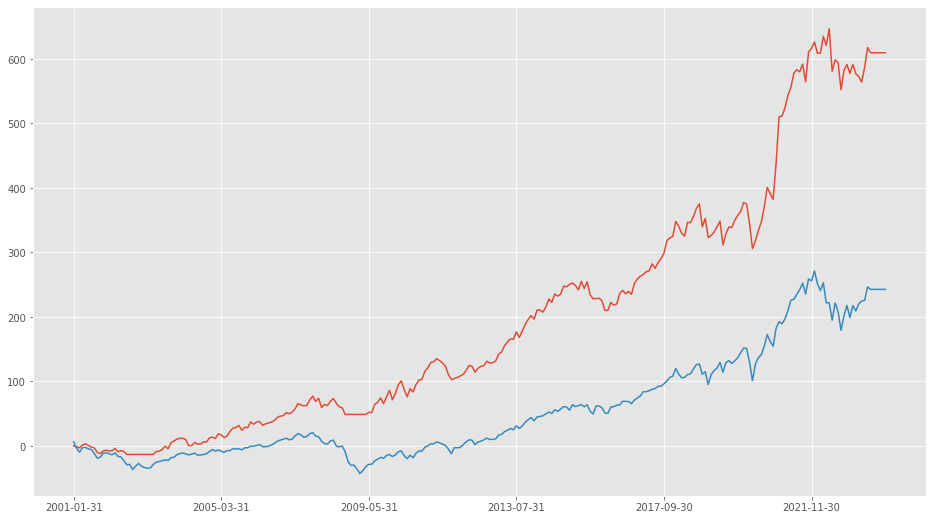

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl

mpl.rc('figure', figsize=(16, 9))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

fig = plt.figure()

benchmark = 100*benchmark_cumulative_returns
#benchmark = 100*fps.MaximumDrawdown().get_series(benchmark_monthly_returns)

data = 100*cumulative_returns
#data = 100*drawdown

#monthly_returns.plot(label=ticker)
data.plot()
benchmark.plot()

fig.savefig(f"data/portfolios/simulation.{experiment_id}.png")
print("STRATEGY vs. BENCHMARK")

In [ ]:
import json

dictionary = simulation.portfolio.to_dict()
json_object = json.dumps(dictionary, indent = 2)
#print(json_object)

with open(f"data/portfolios/simulation.{experiment_id}.json", "w") as outfile:
    json.dump(dictionary, outfile)

print("OK")

OK
